# Combine unfolded results and make final plots

Here is the script to assemble the unfolded results from `2DData_expunc.root` and `2DClosure_expunc.root` and make the final plots of the analysis. 

Note: You have to access the files through cernbox as they are too large for github. 

https://cernbox.cern.ch/cernbox/desktop/index.php/s/rsYvLcidoUFEKV0

https://cernbox.cern.ch/cernbox/desktop/index.php/s/DsRRXR9bEKOGzoU



In [1]:
import ROOT
from Unfolder import *

ROOT.gROOT.Macro("rootlogon.C")



Welcome to JupyROOT 6.10/08


0L

In [2]:
ROOT.gStyle.SetOptStat(000000)
ROOT.gStyle.SetTitleOffset(1.0, "Y");
ROOT.gStyle.SetPadRightMargin(0.15)
ROOT.gStyle.SetTitleFont(43,"XYZ")
ROOT.gStyle.SetTitleSize(30,"XYZ")
ROOT.gStyle.SetTitleOffset(1.0, "X")
ROOT.gStyle.SetTitleOffset(0.8, "Y")
ROOT.gStyle.SetLabelFont(43,"XYZ")
ROOT.gStyle.SetLabelSize(22,"XYZ")

lumi = 2.3e3

pythiafile = "responses_jecsrcs_otherway_qcdmc_2dplots.root"
herwigfile = "qcdmc_herwig_otherway_jecsrcs_2dplots.root"


#### Absolute cross section for ungroomed jets

110667.805171
PDFUP
0.00e+00 +- 0.00e+00 2.24e-02 +- 4.14e-04 9.72e-04 +- 2.00e-05 1.08e-03 +- 1.30e-05 2.04e-04 +- 2.34e-05 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 1.65e-04 +- 7.12e-06 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 9.67e-06 +- 4.72e-06 
1.78e+01 +- 1.05e+00 5.91e+00 +- 1.38e+00 2.92e-02 +- 2.14e-02 5.69e-03 +- 5.82e-05 1.37e-03 +- 4.25e-05 0.00e+00 +- 0.00e+00 8.62e-04 +- 5.25e-05 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 1.01e-05 +- 2.12e-06 0.00e+00 +- 0.00e+00 
8.87e+02 +- 5.23e+01 7.06e+01 +- 5.77e+00 6.43e-01 +- 7.48e-03 8.65e-02 +- 3.26e-03 1.93e-02 +- 2.97e-04 3.13e-03 +- 4.62e-04 3.83e-04 +- 2.44e-05 5.19e-05 +- 8.68e-06 8.29e-05 +- 9.84e-06 1.85e-06 +- 7.92e-07 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 
4.78e+04 +- 1.94e+03 3.69e+03 +- 8.54e+01 3.44e+01 +- 3.98e-01 6.70e+00 +- 9.52e-02 1.10e+00 +- 1.33e-02 2.09e-01 +- 3.71e-03 3.23e-02 +- 7.19e-04 7.22e-03 +- 2.07e-04 1.97e-03 +- 9.51e-04 1.70e-04 +- 2.66e-05 1.42e-04 +-

0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 3.12e-03 +- 1.38e-03 
0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 2.41e-03 +- 1.26e-03 
0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 3.22e-03 +- 1.36e-03 
0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 1.27e-03 +

0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 2.51e-05 +- 2.43e-05 
0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 8.48e-09 +- 1.27e-08 
0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 
0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +

Info in <TCanvas::Print>: png file fullxs_absolute1.png has been created
Info in <TCanvas::Print>: pdf file fullxs_absolute1.pdf has been created
Info in <TCanvas::Print>: png file fullxs_absolute2.png has been created
Info in <TCanvas::Print>: pdf file fullxs_absolute2.pdf has been created
Info in <TCanvas::Print>: png file fullxs_absolute3.png has been created
Info in <TCanvas::Print>: pdf file fullxs_absolute3.pdf has been created
Info in <TCanvas::Print>: png file fullxs_absolute4.png has been created
Info in <TCanvas::Print>: pdf file fullxs_absolute4.pdf has been created
Info in <TCanvas::Print>: png file fullxs_absolute5.png has been created
Info in <TCanvas::Print>: pdf file fullxs_absolute5.pdf has been created
Info in <TCanvas::Print>: png file fullxs_absolute6.png has been created
Info in <TCanvas::Print>: pdf file fullxs_absolute6.pdf has been created
Info in <TCanvas::Print>: png file fullxs_absolute7.png has been created
Info in <TCanvas::Print>: pdf file fullxs_absolute7

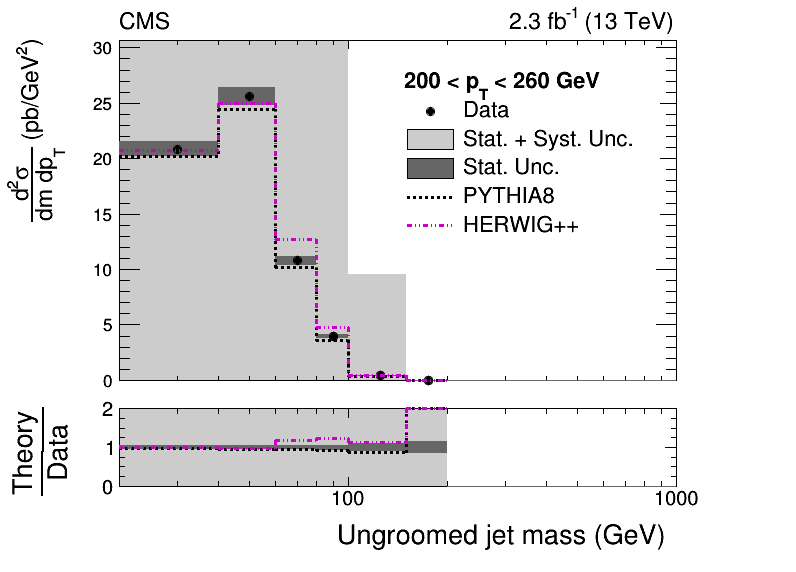

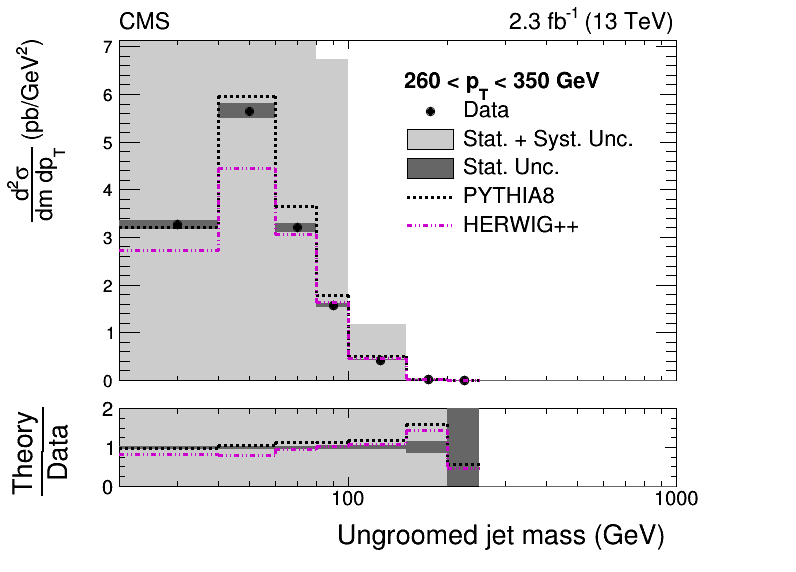

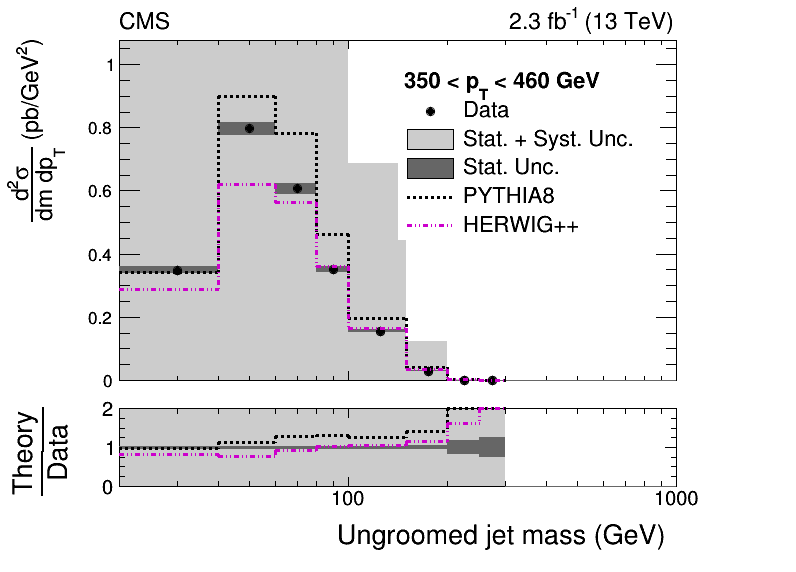

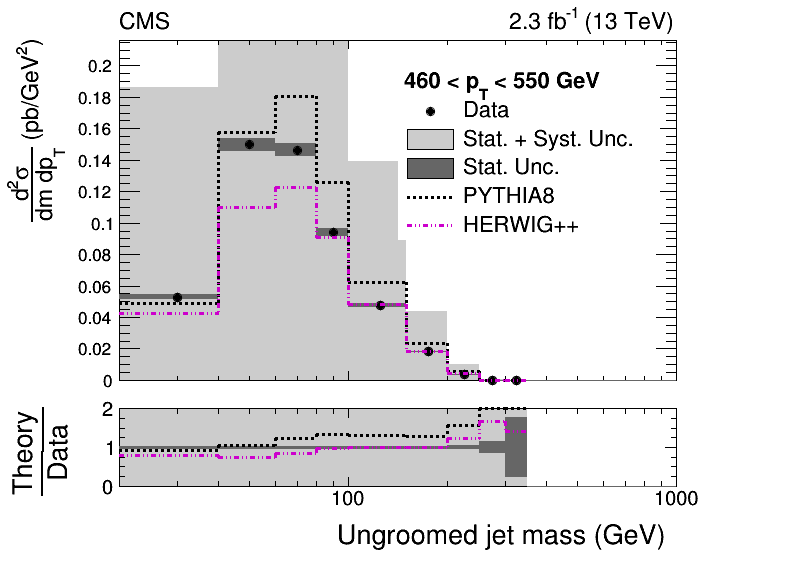

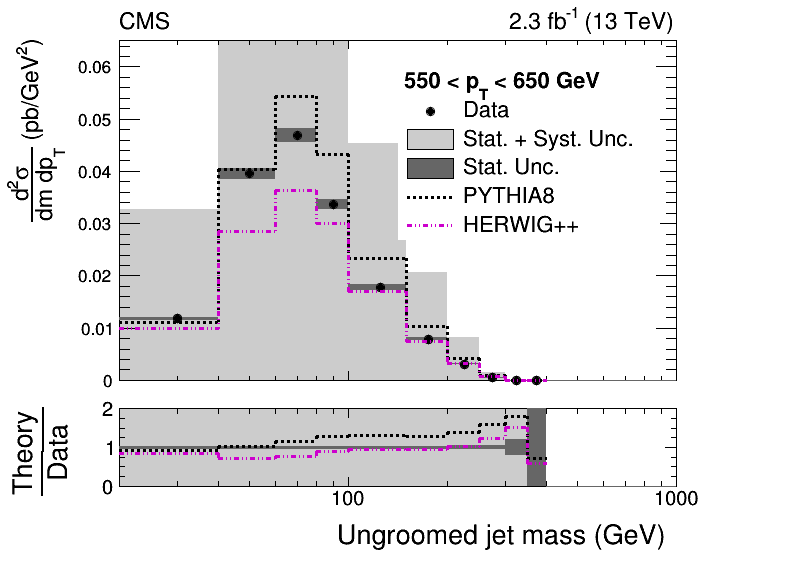

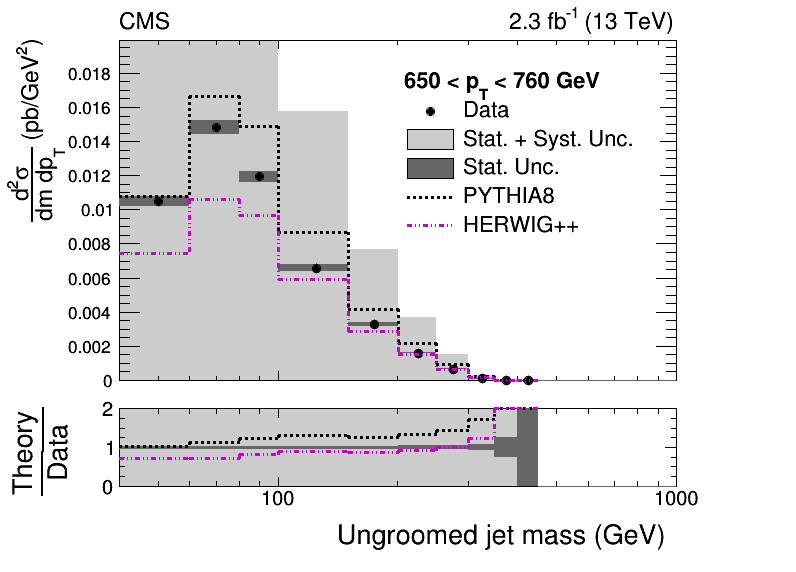

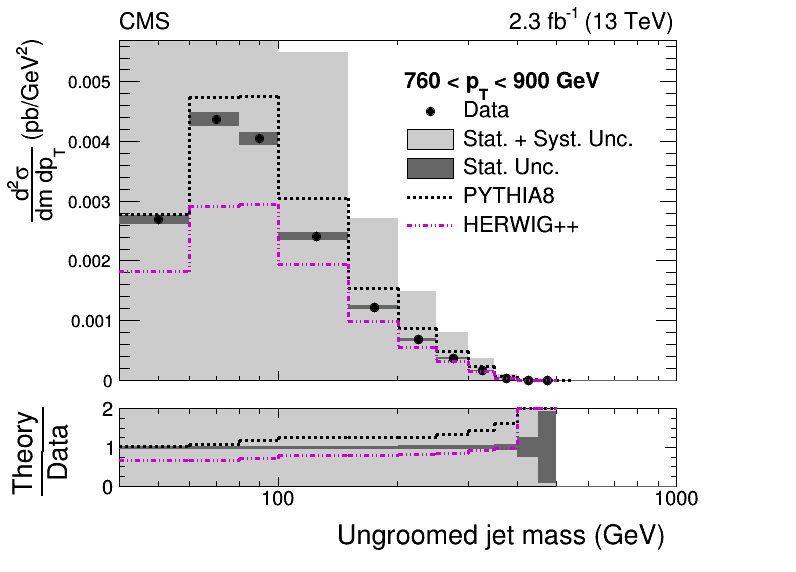

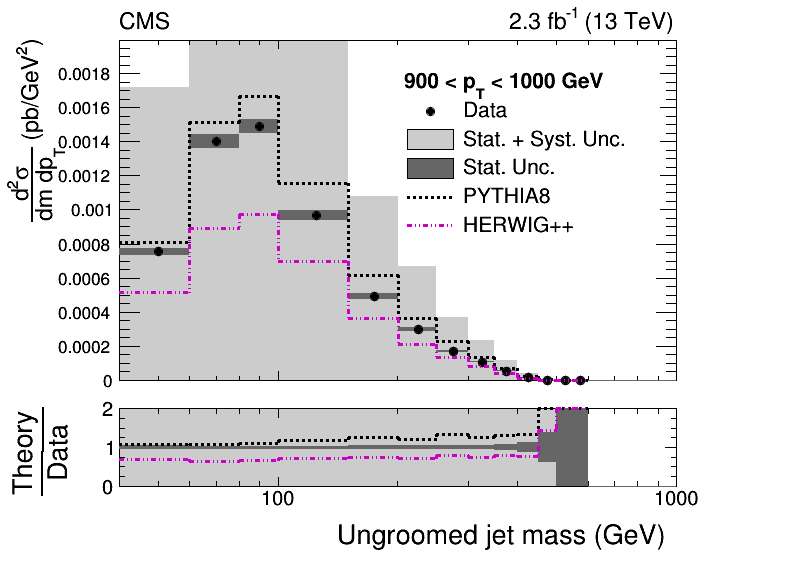

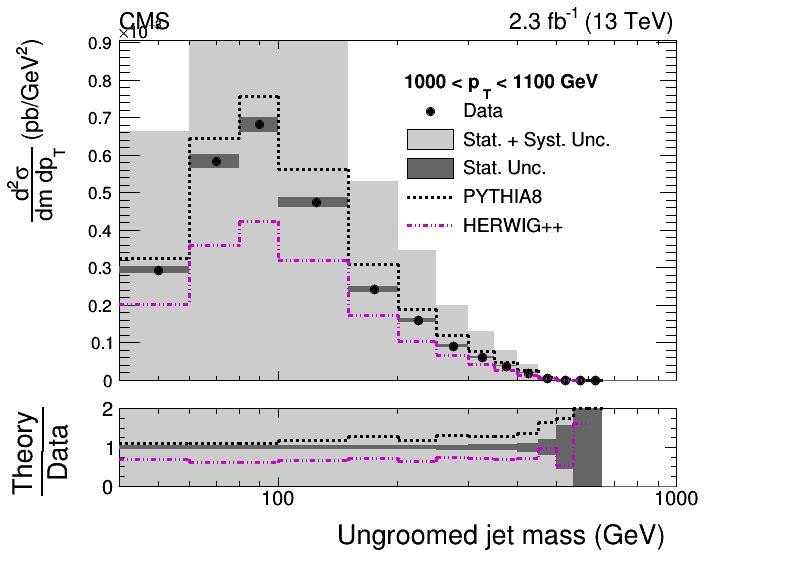

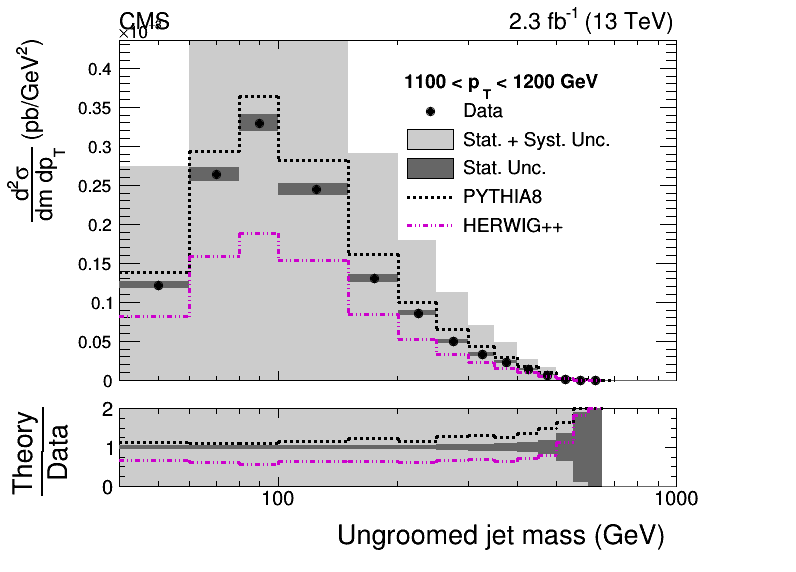

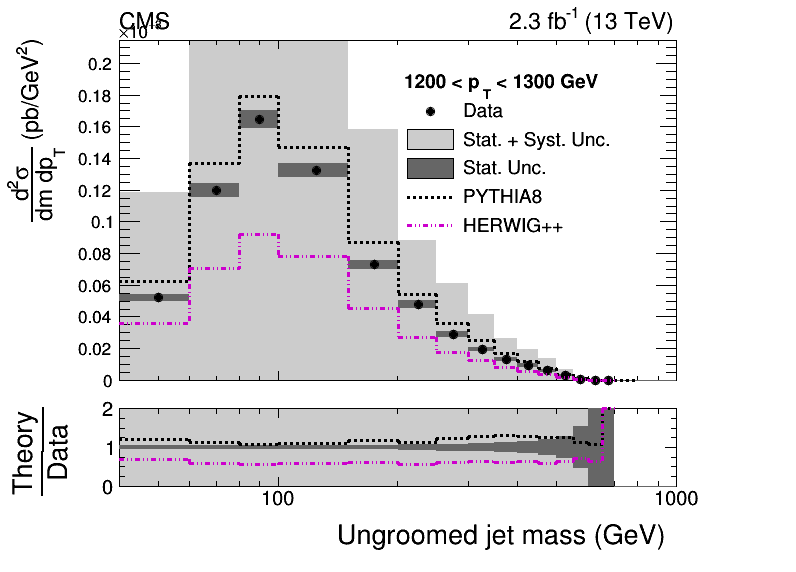

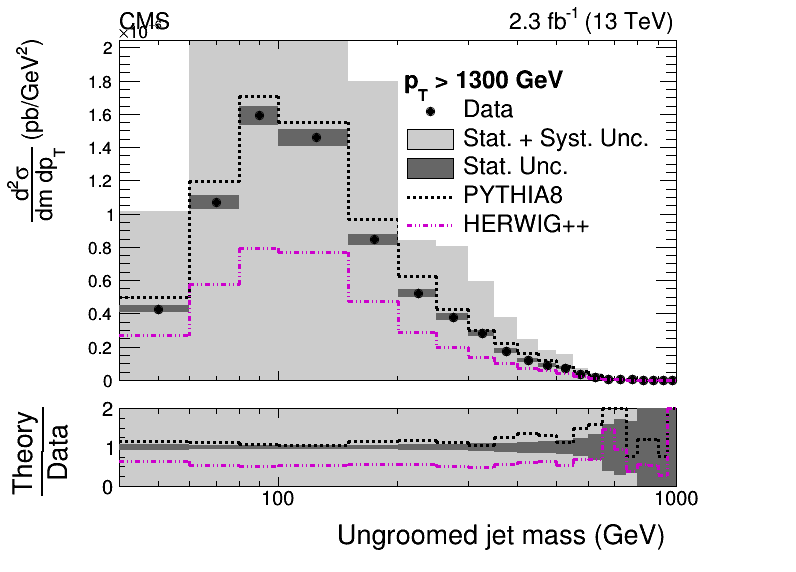

In [3]:
uu = RooUnfoldUnfolder(useSoftDrop=False,
                       pythiaInputs=pythiafile,
                       herwigInputs=herwigfile,
                       powhegInputs="CMS_SMP_16_010.root",
                       normalizeUnity=False, scalePtBins=False, lumi=lumi,
                       postfix="absolute") 

print 'data integral:' , uu.nom.Integral() 
print 'pythia integral:' , uu.pythiaHist.Integral()
print 'herwig integral:' , uu.herwigHist.Integral() 

uu.plotFullXSProjections( hists=[uu.nom, uu.nomStat,uu.pythiaHist,uu.herwigHist],
                              styleNames=['nom','nomStat','pythia','herwig'] )




#### Absolute cross section for groomed jets. 

109105.935008
PDFUP
8.48e+02 +- 7.08e+01 2.43e+02 +- 1.06e+01 5.39e+01 +- 1.78e+00 1.37e+01 +- 1.78e-01 4.03e+00 +- 5.09e-02 1.47e+00 +- 1.80e-02 6.55e-01 +- 7.82e-03 1.76e-01 +- 3.27e-03 9.09e-02 +- 2.52e-03 4.57e-02 +- 1.62e-03 2.21e-02 +- 9.49e-04 3.52e-02 +- 1.50e-03 
1.63e+04 +- 4.40e+02 2.64e+03 +- 3.56e+01 3.26e+02 +- 3.70e+00 2.18e+02 +- 1.18e+00 7.13e+01 +- 4.27e-01 2.56e+01 +- 1.64e-01 1.14e+01 +- 7.28e-02 3.05e+00 +- 3.42e-02 1.49e+00 +- 2.23e-02 7.67e-01 +- 1.56e-02 4.02e-01 +- 1.04e-02 5.70e-01 +- 1.52e-02 
1.67e+04 +- 3.89e+02 3.84e+03 +- 4.58e+01 4.83e+02 +- 4.80e+00 1.79e+02 +- 8.64e-01 5.94e+01 +- 3.15e-01 2.08e+01 +- 1.20e-01 8.63e+00 +- 4.90e-02 2.24e+00 +- 2.33e-02 1.03e+00 +- 1.42e-02 5.04e-01 +- 9.59e-03 2.53e-01 +- 6.50e-03 3.45e-01 +- 8.06e-03 
1.49e+04 +- 4.38e+02 4.43e+03 +- 5.68e+01 7.93e+02 +- 7.71e+00 1.66e+02 +- 1.03e+00 5.47e+01 +- 3.79e-01 2.07e+01 +- 1.50e-01 9.14e+00 +- 6.63e-02 2.37e+00 +- 2.89e-02 1.08e+00 +- 1.79e-02 5.22e-01 +- 1.16e-02 2.49e-01 +-

0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 9.66e-08 +- 6.96e-08 1.61e-03 +- 1.02e-03 1.07e-02 +- 2.56e-03 
0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 4.04e-03 +- 1.56e-03 
0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 1.55e-03 +- 8.77e-04 
0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 3.00e-03 +

2.84e-01 +- 2.67e-02 7.65e+01 +- 8.16e+00 2.08e+02 +- 4.11e+00 6.76e+01 +- 7.43e-01 3.08e+01 +- 3.40e-01 1.18e+01 +- 1.39e-01 4.62e+00 +- 5.91e-02 1.15e+00 +- 2.84e-02 5.19e-01 +- 1.85e-02 2.63e-01 +- 1.29e-02 1.35e-01 +- 9.50e-03 1.48e-01 +- 1.05e-02 
0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 7.80e+00 +- 1.04e+00 1.79e+01 +- 3.89e-01 1.58e+01 +- 2.39e-01 7.69e+00 +- 1.10e-01 3.68e+00 +- 5.25e-02 9.69e-01 +- 2.61e-02 4.52e-01 +- 1.71e-02 2.25e-01 +- 1.18e-02 1.03e-01 +- 7.93e-03 1.29e-01 +- 9.73e-03 
0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 1.72e-02 +- 5.78e-03 7.89e-01 +- 7.30e-02 3.40e+00 +- 1.09e-01 3.73e+00 +- 7.57e-02 2.45e+00 +- 4.26e-02 6.94e-01 +- 2.15e-02 3.52e-01 +- 1.48e-02 1.83e-01 +- 1.06e-02 1.00e-01 +- 7.97e-03 1.08e-01 +- 8.88e-03 
0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 6.58e-03 +- 1.25e-03 2.55e-01 +- 2.99e-02 8.07e-01 +- 3.48e-02 1.24e+00 +- 2.98e-02 5.04e-01 +- 1.87e-02 2.90e-01 +- 1.37e-02 1.34e-01 +- 8.97e-03 6.95e-02 +- 6.32e-03 1.12e-01 +

Info in <TCanvas::Print>: png file fullxs_absolute_softdrop1.png has been created
Info in <TCanvas::Print>: pdf file fullxs_absolute_softdrop1.pdf has been created
Info in <TCanvas::Print>: png file fullxs_absolute_softdrop2.png has been created
Info in <TCanvas::Print>: pdf file fullxs_absolute_softdrop2.pdf has been created
Info in <TCanvas::Print>: png file fullxs_absolute_softdrop3.png has been created
Info in <TCanvas::Print>: pdf file fullxs_absolute_softdrop3.pdf has been created
Info in <TCanvas::Print>: png file fullxs_absolute_softdrop4.png has been created
Info in <TCanvas::Print>: pdf file fullxs_absolute_softdrop4.pdf has been created
Info in <TCanvas::Print>: png file fullxs_absolute_softdrop5.png has been created
Info in <TCanvas::Print>: pdf file fullxs_absolute_softdrop5.pdf has been created
Info in <TCanvas::Print>: png file fullxs_absolute_softdrop6.png has been created
Info in <TCanvas::Print>: pdf file fullxs_absolute_softdrop6.pdf has been created
Info in <TCanvas

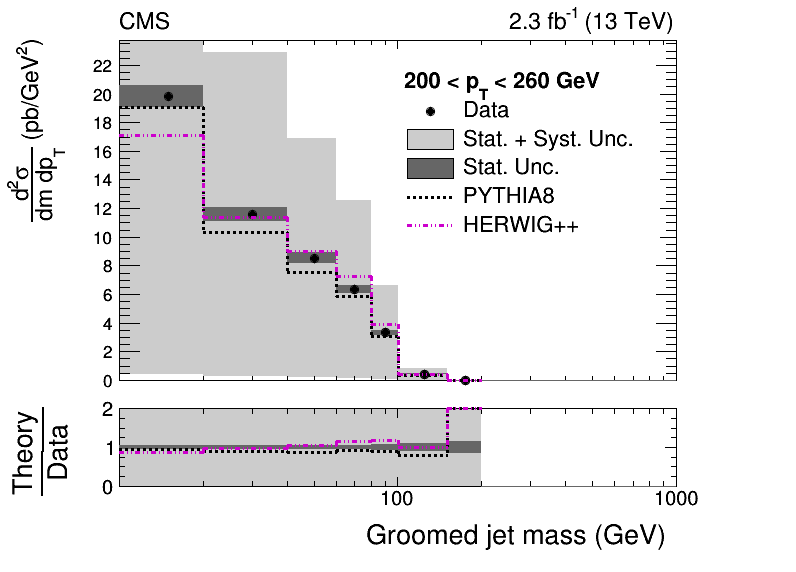

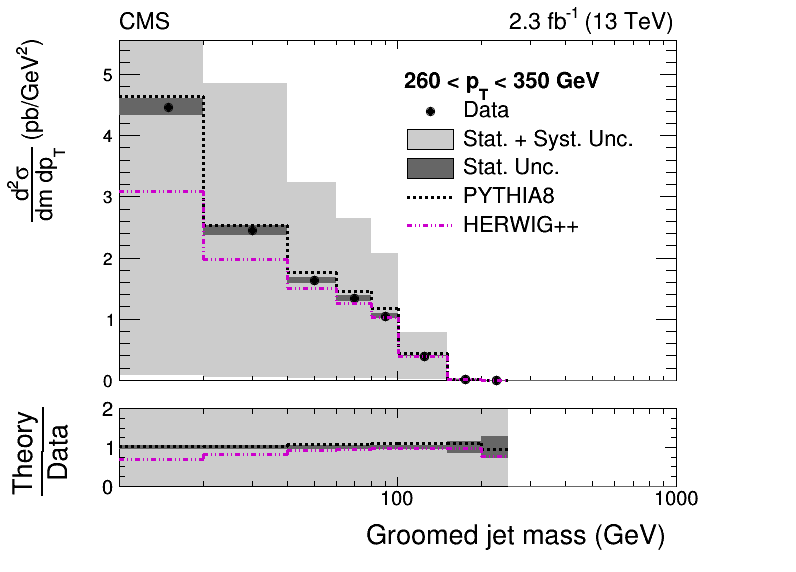

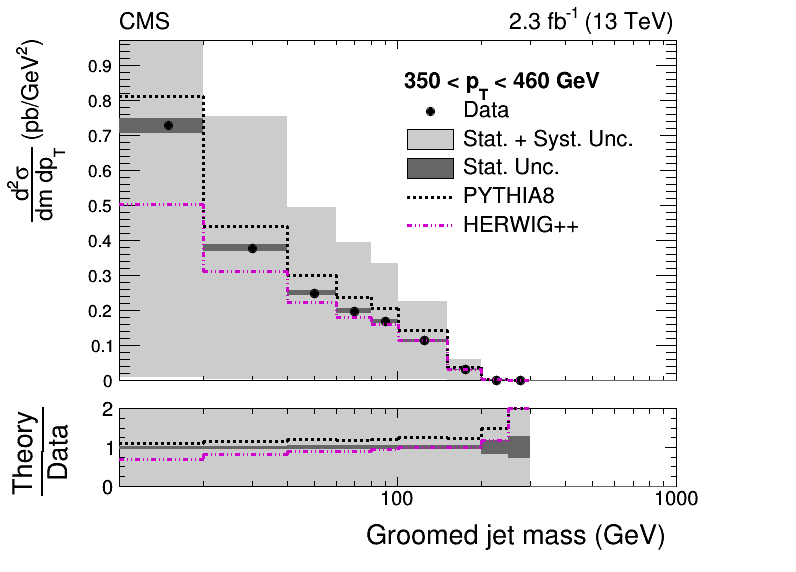

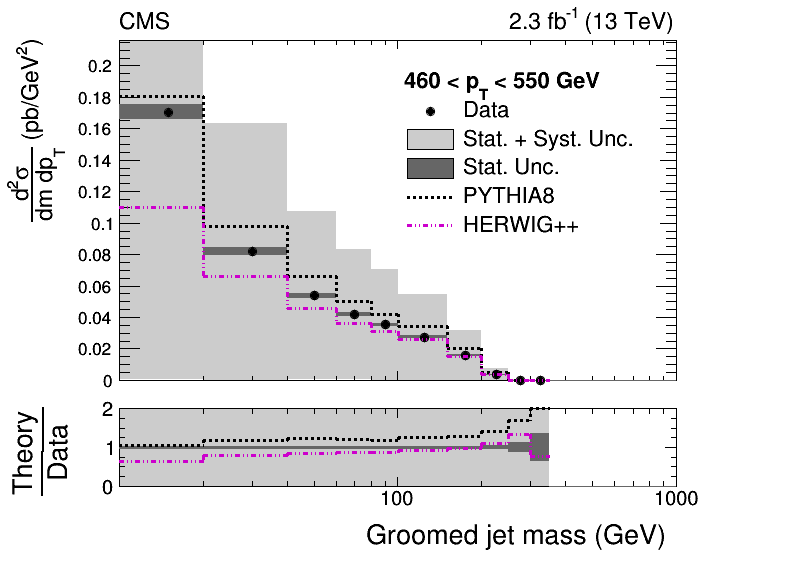

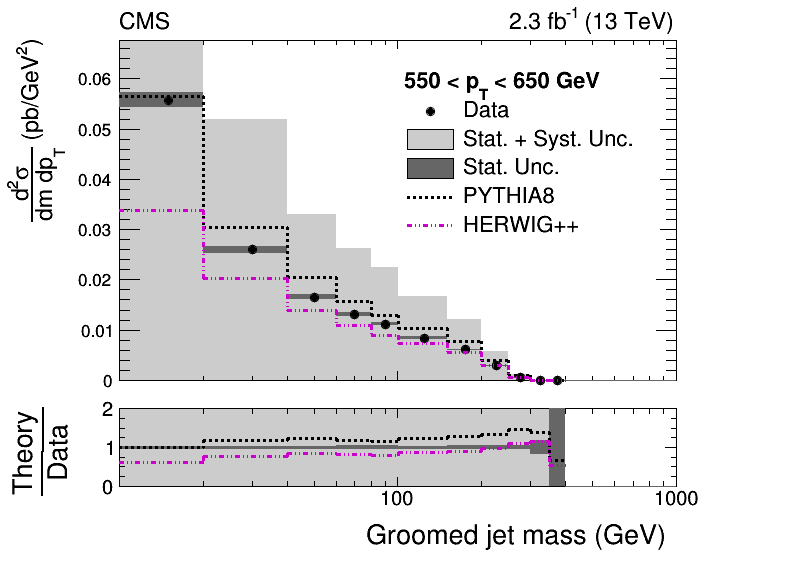

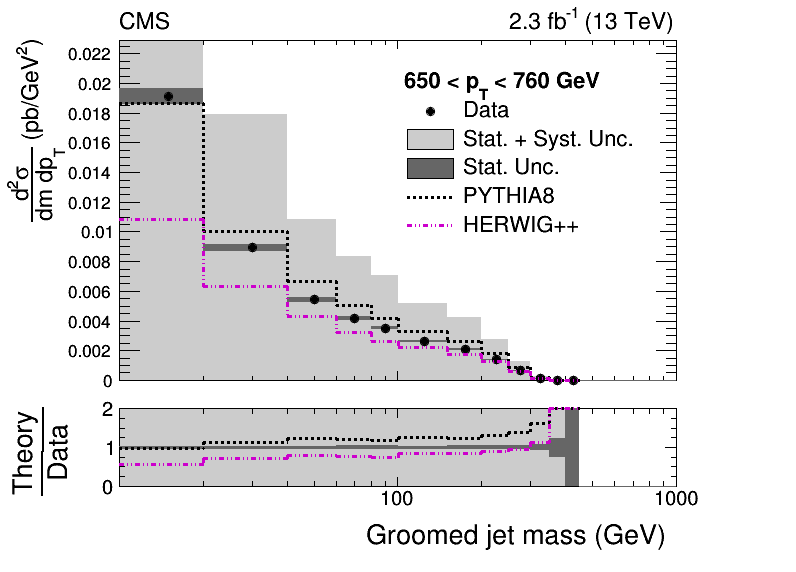

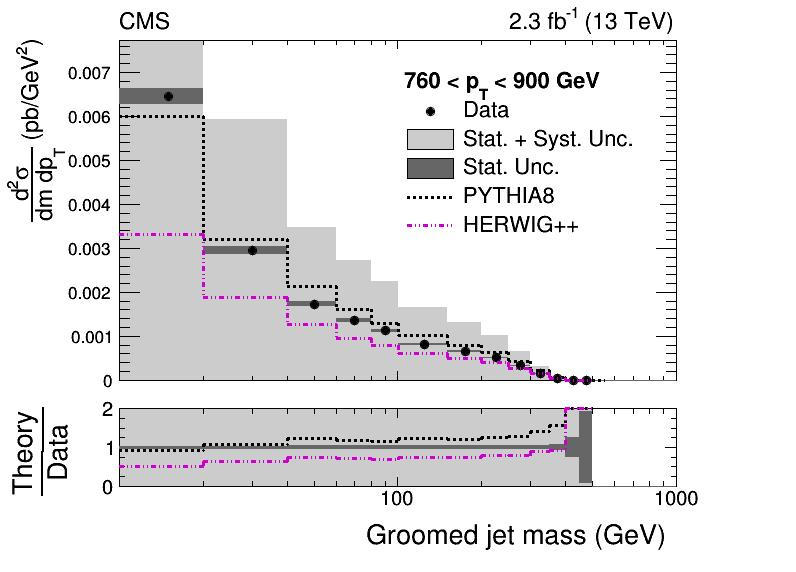

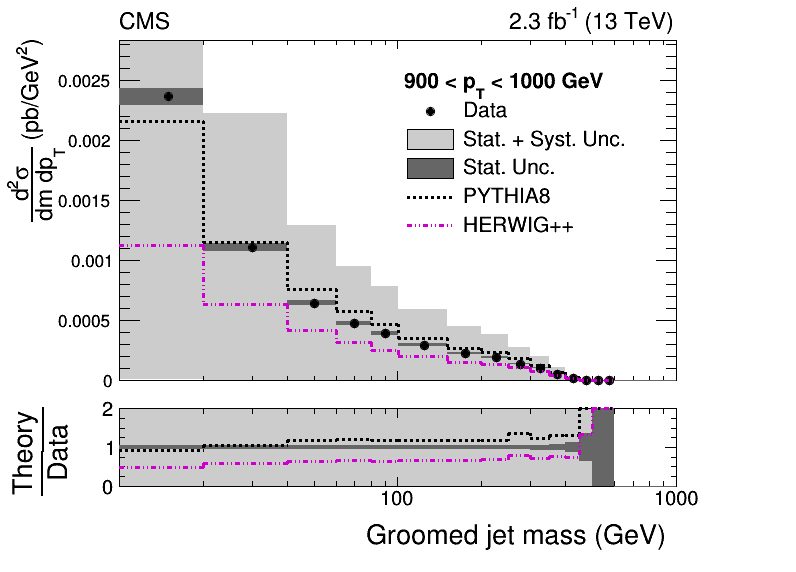

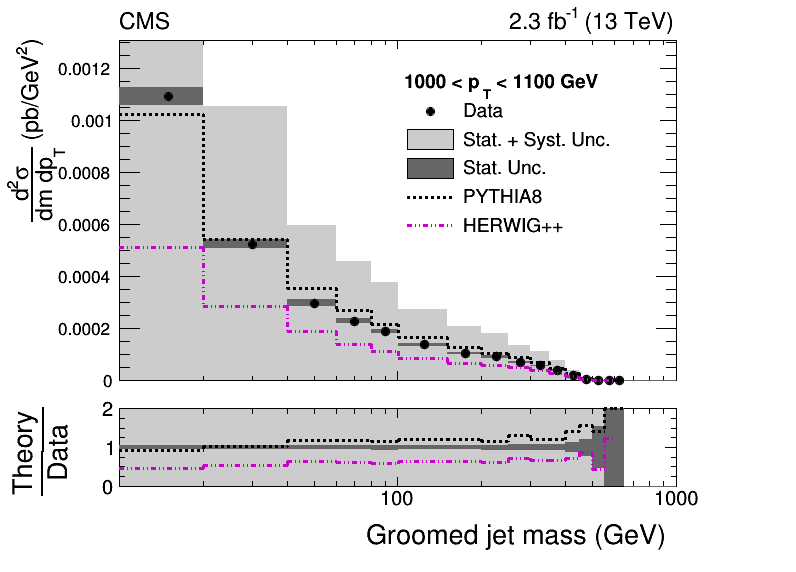

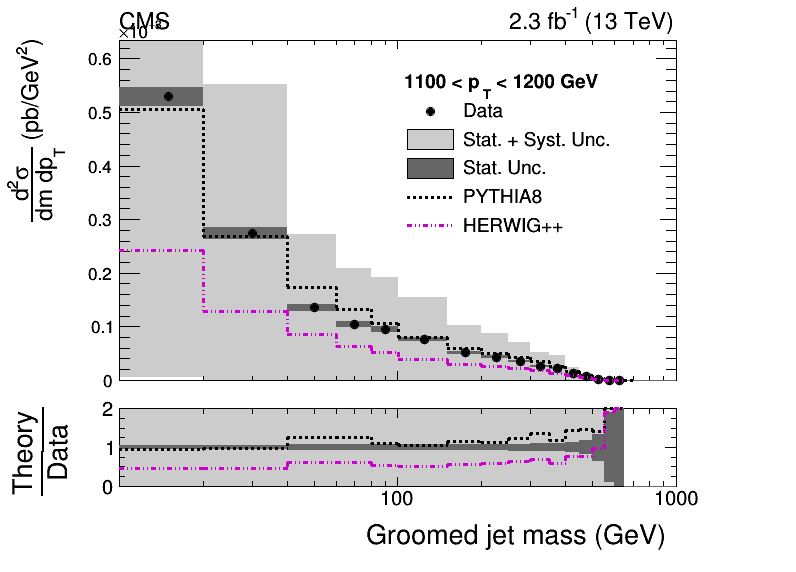

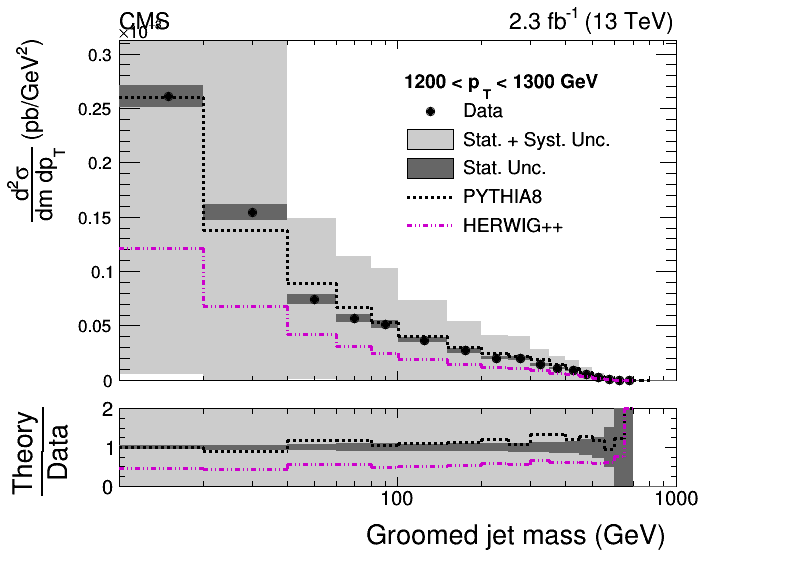

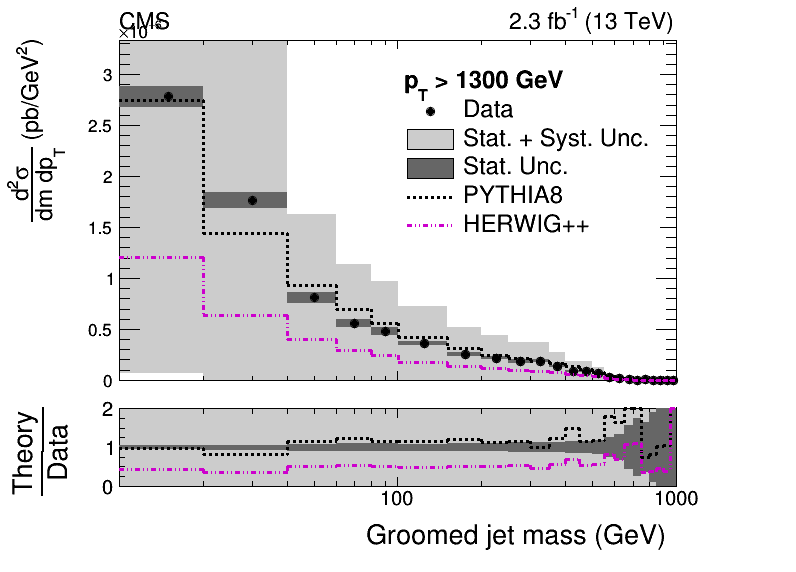

In [4]:

ug = RooUnfoldUnfolder(useSoftDrop=True,
                       pythiaInputs=pythiafile,
                       herwigInputs=herwigfile,
                       powhegInputs="CMS_SMP_16_010.root",
                       normalizeUnity=False, scalePtBins=False, lumi=lumi,
                       postfix="absolute_softdrop") 

ug.plotFullXSProjections( hists=[ug.nom, ug.nomStat,ug.pythiaHist,ug.herwigHist],
                              styleNames=['nom','nomStat','pythia','herwig'] )


#### Absolute cross section wrt pt

Info in <TCanvas::Print>: png file pt_xs.png has been created
Info in <TCanvas::Print>: pdf file pt_xs.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file pt_xs.root has been created


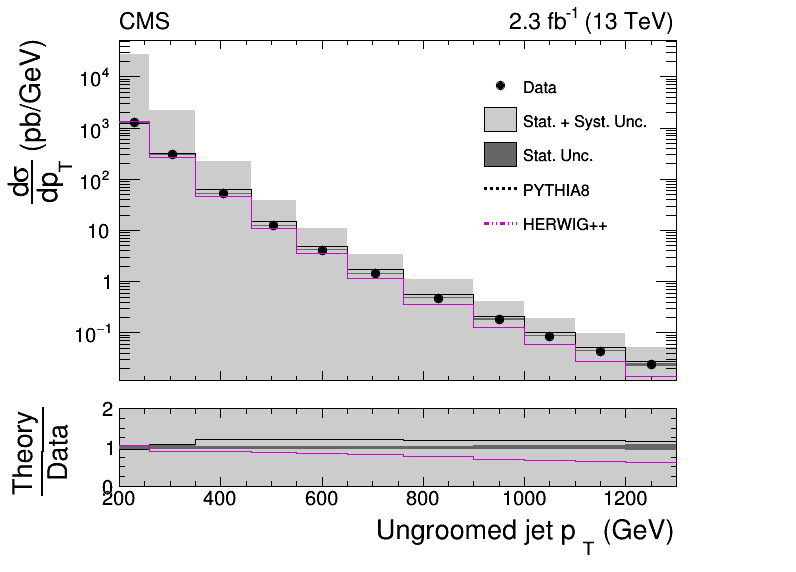

In [5]:
uu.plotPtDist( hists=[uu.nom, uu.nomStat, uu.pythiaHist, uu.herwigHist],
                   styleNames=['nom','nomStat','pythia','herwig'],
                   filename = "pt_xs", title=";Ungroomed jet p_{T} (GeV);#frac{d#sigma}{dp_{T}} (pb/GeV)" )






#### Then plot uncertainties


123597.850816
PDFUP
0.00e+00 +- 0.00e+00 2.25e-06 +- 2.49e-07 2.75e-07 +- 2.57e-07 1.24e-07 +- 5.57e-09 1.29e-08 +- 1.17e-09 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 1.89e-08 +- 4.54e-10 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 1.78e-09 +- 1.81e-10 
2.15e-03 +- 9.64e-05 5.63e-04 +- 5.29e-05 1.97e-06 +- 1.15e-06 5.74e-07 +- 6.52e-08 1.38e-07 +- 3.36e-09 0.00e+00 +- 0.00e+00 1.07e-07 +- 5.20e-09 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 2.28e-09 +- 9.18e-11 0.00e+00 +- 0.00e+00 
1.06e-01 +- 5.93e-03 7.14e-03 +- 3.65e-04 9.48e-05 +- 4.51e-05 6.89e-06 +- 2.94e-07 3.17e-06 +- 1.33e-06 2.85e-07 +- 3.40e-08 4.74e-08 +- 2.42e-09 1.25e-08 +- 1.08e-09 1.11e-08 +- 5.62e-10 5.18e-10 +- 5.56e-11 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 
5.46e+00 +- 1.72e-01 3.95e-01 +- 1.62e-02 5.04e-03 +- 2.47e-03 6.47e-04 +- 1.81e-05 1.12e-04 +- 1.17e-06 2.27e-05 +- 3.11e-07 3.80e-06 +- 6.34e-08 1.00e-06 +- 2.91e-08 2.16e-07 +- 2.53e-08 2.26e-08 +- 1.18e-09 2.92e-08 +-

0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 2.54e-09 +- 3.77e-09 8.81e-07 +- 5.39e-08 
0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 5.33e-07 +- 4.48e-08 
0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 2.44e-07 +- 2.02e-08 
0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 1.73e-07 +

0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 3.26e-09 +- 1.07e-09 
0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 1.69e-09 +- 8.02e-10 
0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 8.56e-10 +- 5.28e-10 
0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 7.77e-10 +

0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 1.39e-08 +- 2.24e-09 
0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 7.64e-09 +- 1.78e-09 
0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 2.84e-09 +- 9.08e-10 
0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 1.63e-09 +

Info in <TCanvas::Print>: png file uncertainties_ungroomed_absolute1.png has been created
Info in <TCanvas::Print>: pdf file uncertainties_ungroomed_absolute1.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file uncertainties_ungroomed_absolute1.root has been created
Info in <TCanvas::Print>: png file uncertainties_ungroomed_absolute2.png has been created
Info in <TCanvas::Print>: pdf file uncertainties_ungroomed_absolute2.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file uncertainties_ungroomed_absolute2.root has been created
Info in <TCanvas::Print>: png file uncertainties_ungroomed_absolute3.png has been created
Info in <TCanvas::Print>: pdf file uncertainties_ungroomed_absolute3.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file uncertainties_ungroomed_absolute3.root has been created
Info in <TCanvas::Print>: png file uncertainties_ungroomed_absolute4.png has been created
Info in <TCanvas::Print>: pdf file uncertainties_ungroomed_absolute4.pdf has been created
I

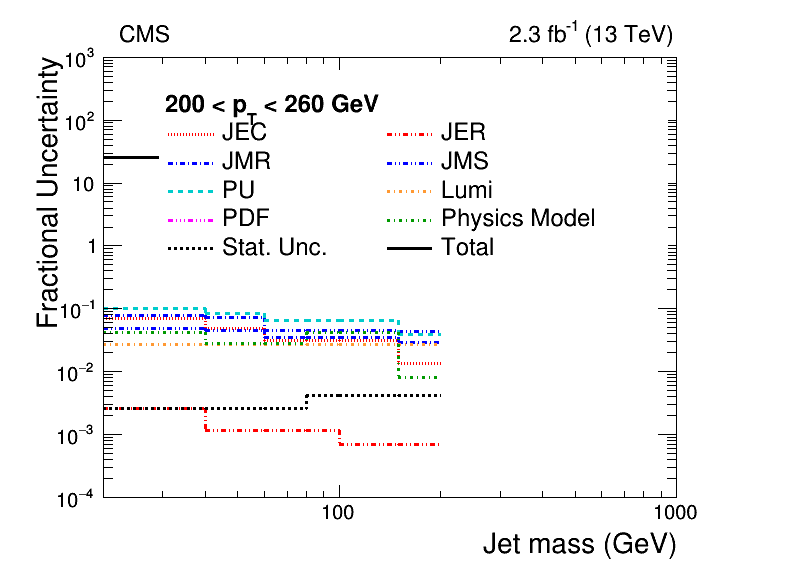

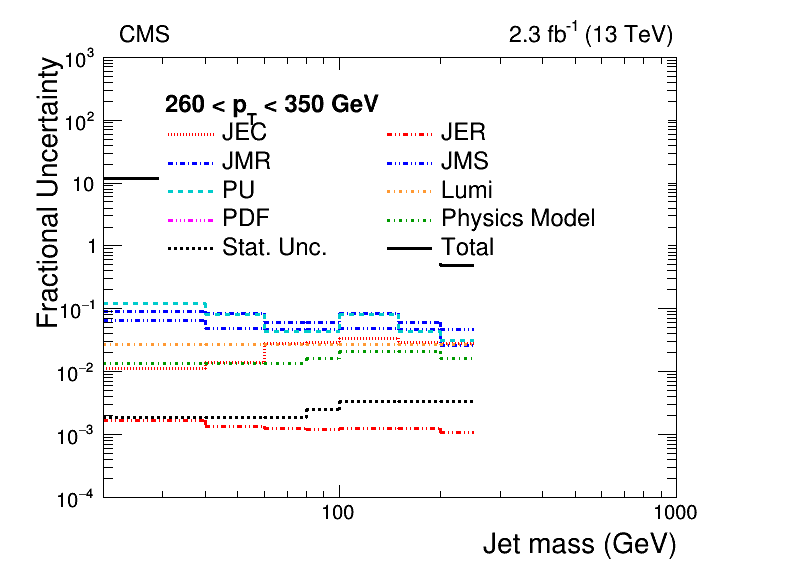

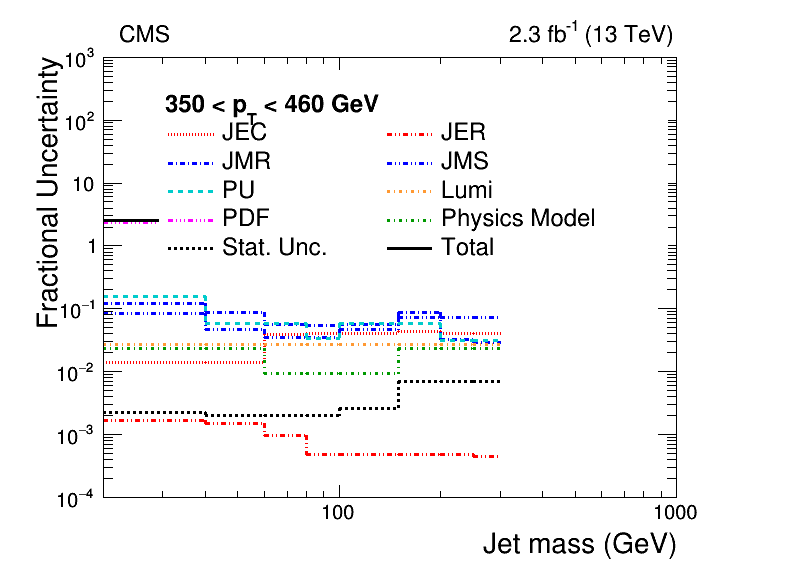

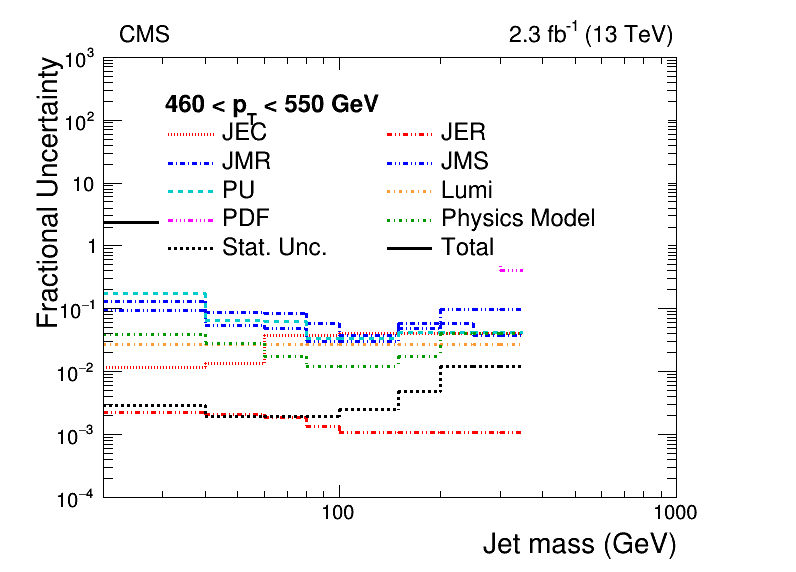

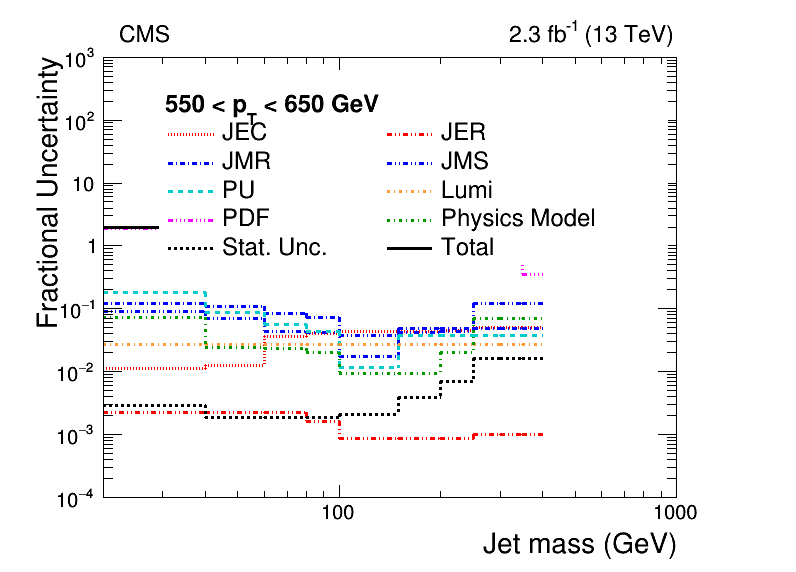

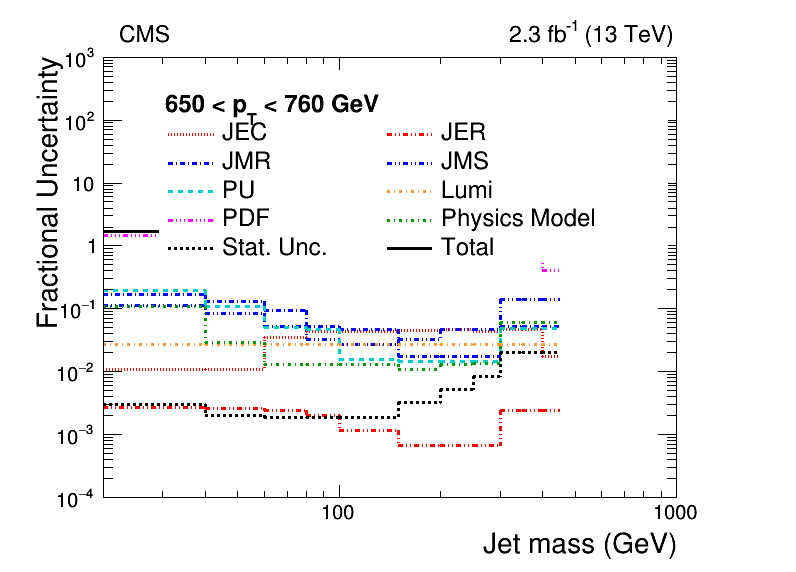

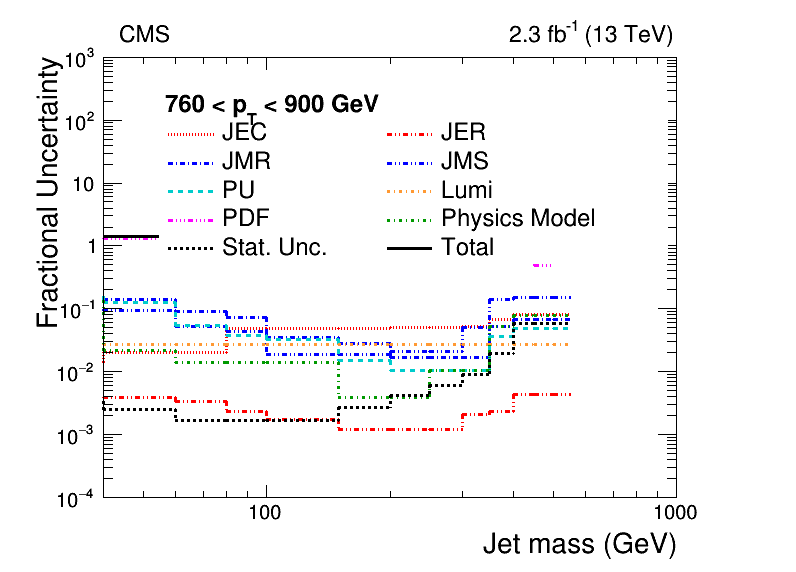

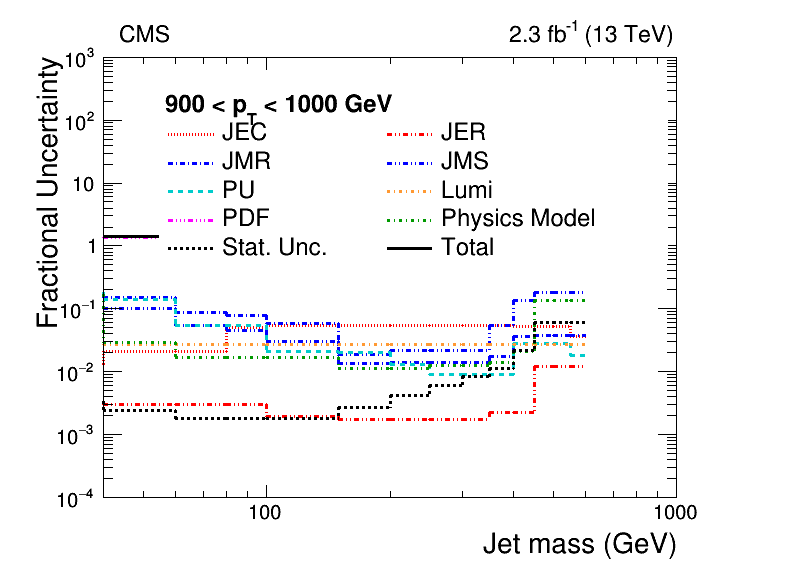

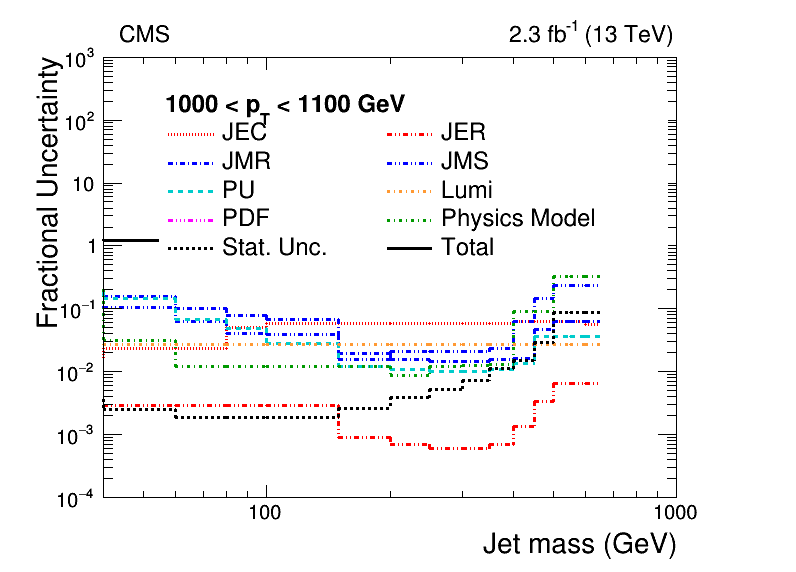

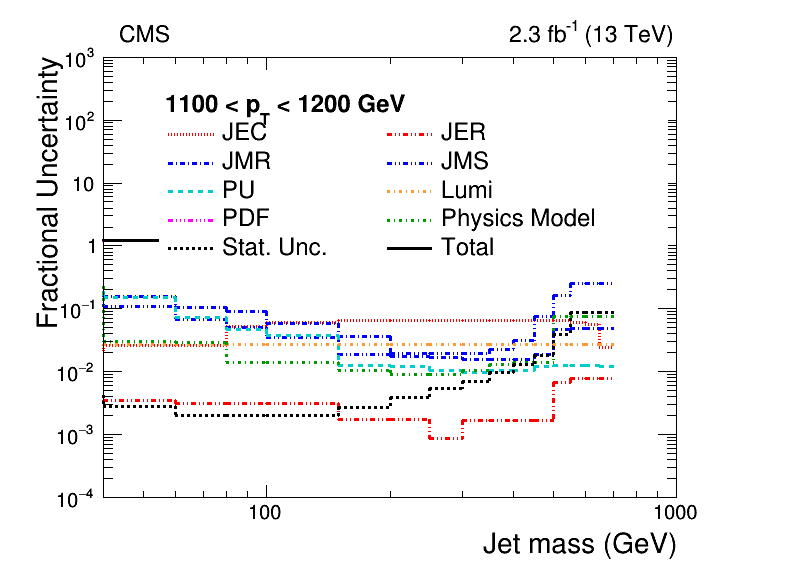

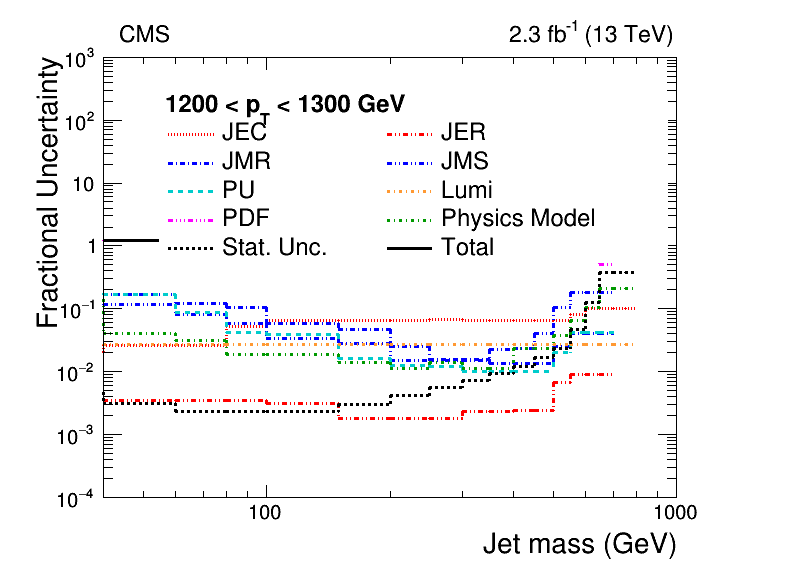

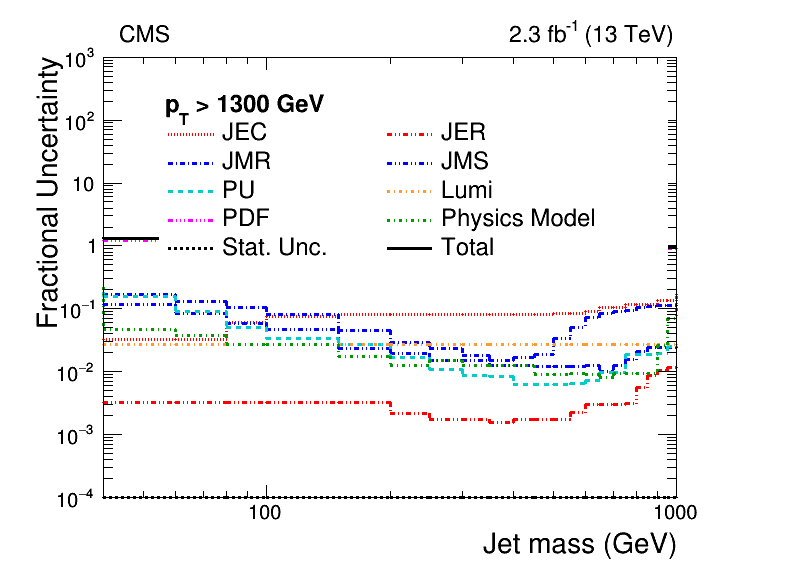

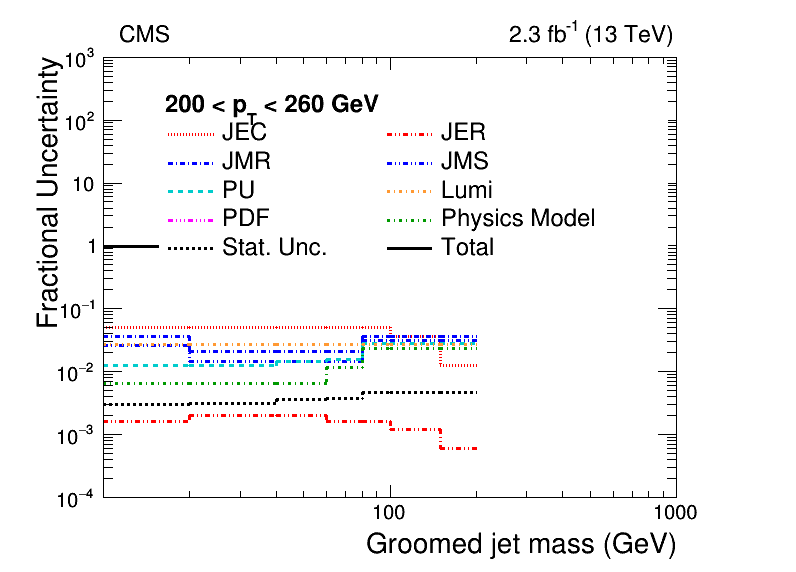

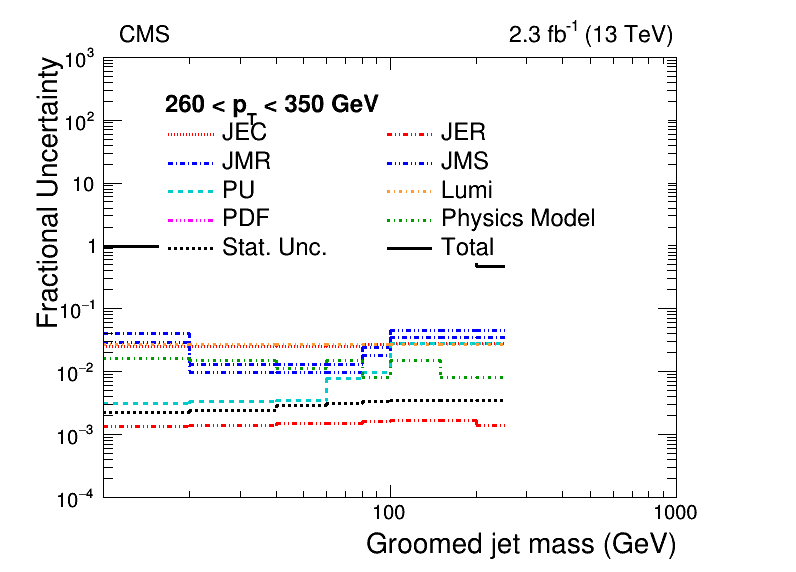

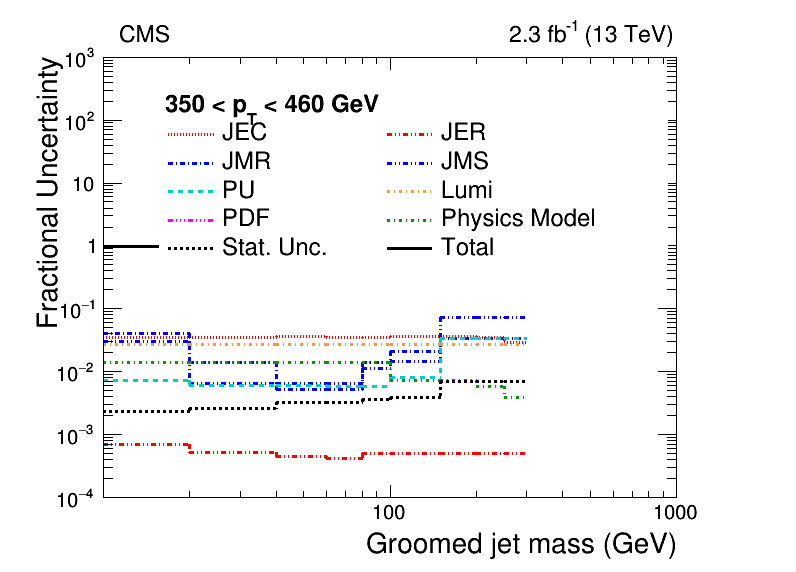

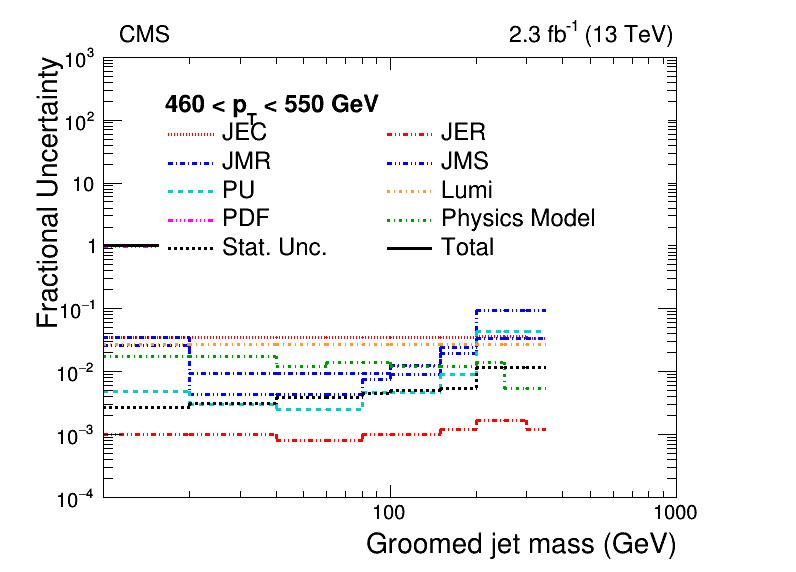

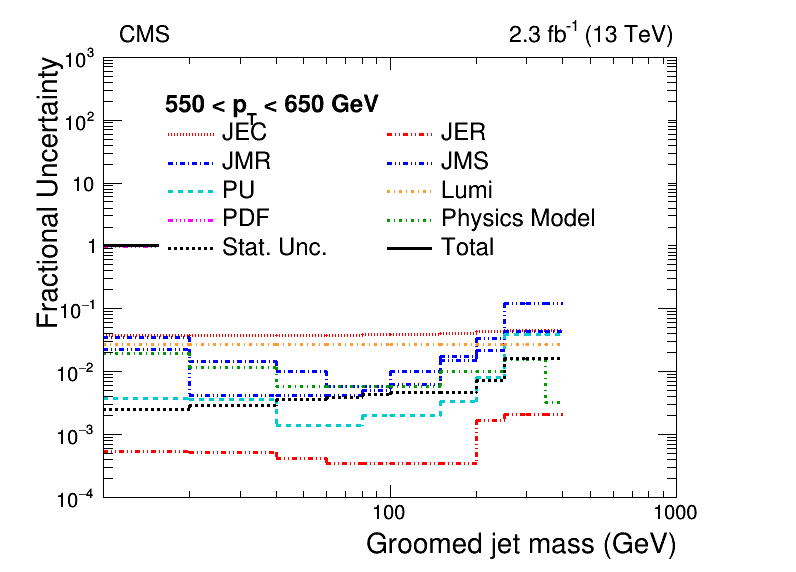

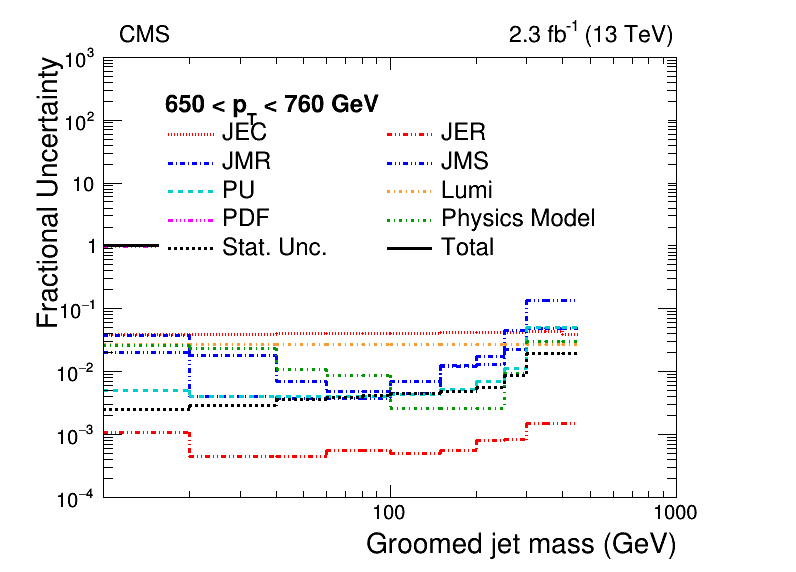

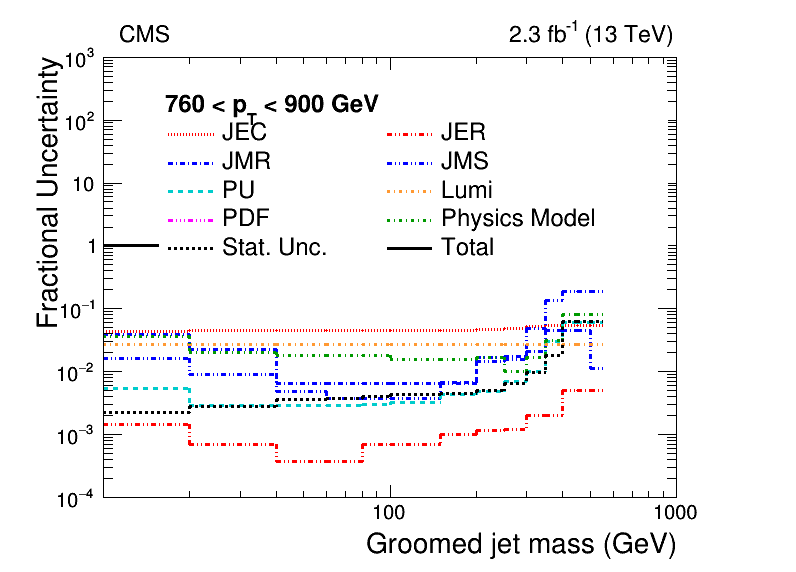

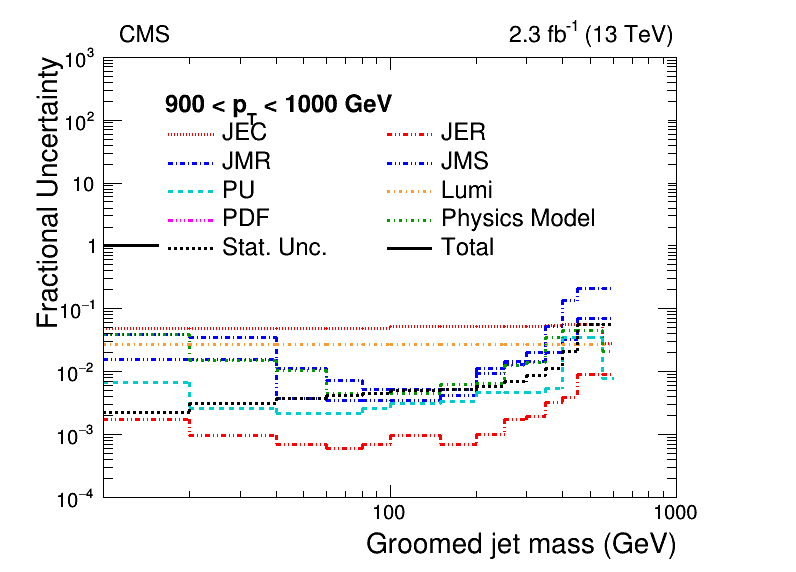

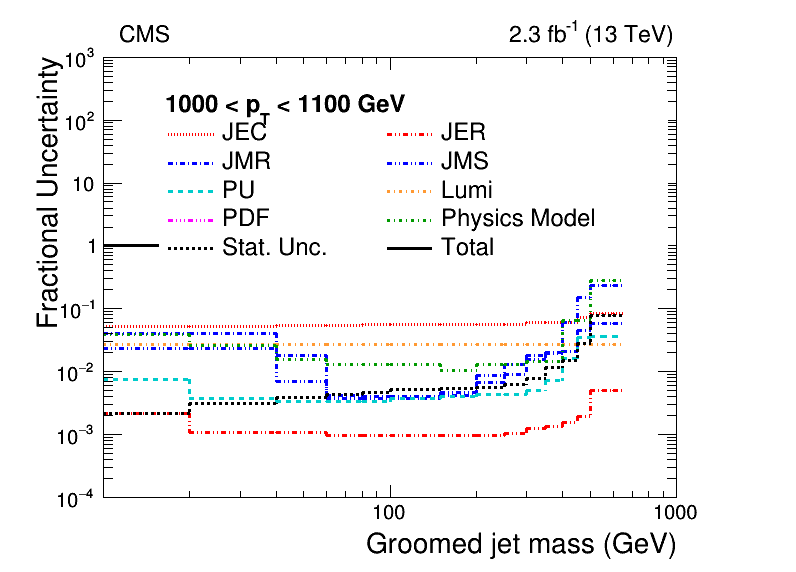

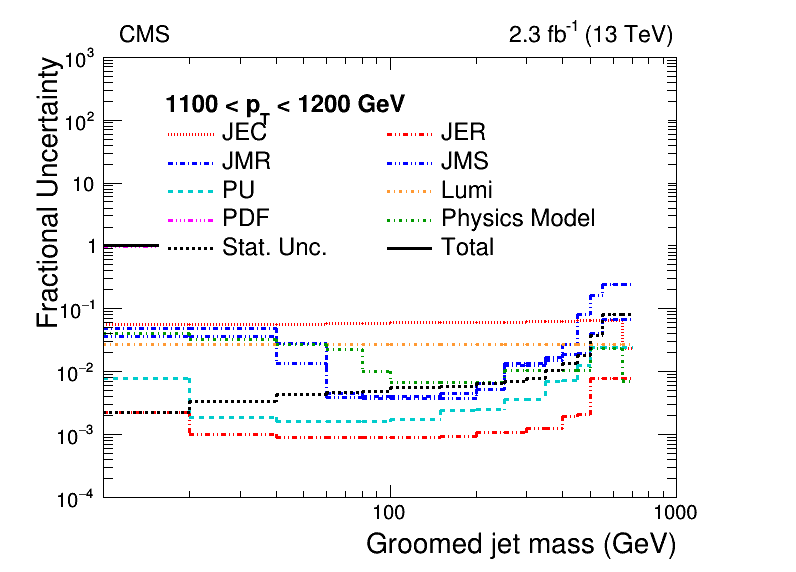

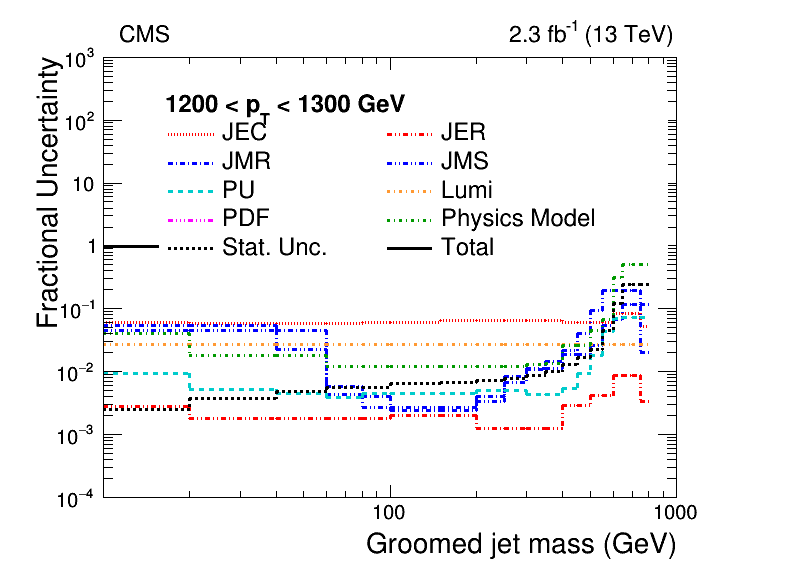

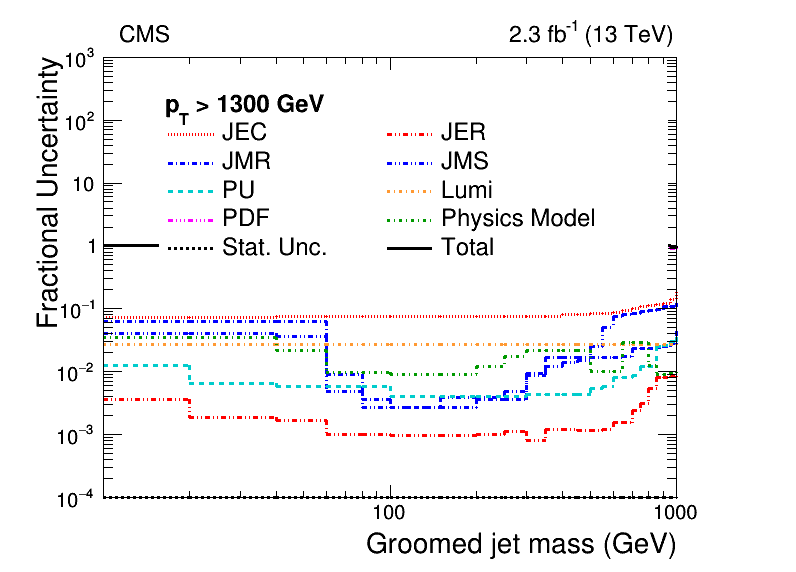

In [6]:
uumc = RooUnfoldUnfolder(useSoftDrop=False,inputs='2DClosure',
                       pythiaInputs=pythiafile,
                       herwigInputs=herwigfile,
                       powhegInputs="CMS_SMP_16_010.root",
                       normalizeUnity=False, scalePtBins=False, lumi=lumi, postfix="ungroomed_absolute")
ugmc = RooUnfoldUnfolder(useSoftDrop=True,inputs='2DClosure',
                       pythiaInputs=pythiafile,
                       herwigInputs=herwigfile,
                       powhegInputs="CMS_SMP_16_010.root",
                       normalizeUnity=False, scalePtBins=False, lumi=lumi, postfix="softdrop_absolute") 

uumc.plotFullUncs( hists=uumc.uncertainties )
ugmc.plotFullUncs( hists=ugmc.uncertainties )




#### Normalized cross section, ungroomed

110667.805171
PDFUP
0.00e+00 +- 0.00e+00 2.24e-02 +- 4.14e-04 9.72e-04 +- 2.00e-05 1.08e-03 +- 1.30e-05 2.04e-04 +- 2.34e-05 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 1.65e-04 +- 7.12e-06 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 9.67e-06 +- 4.72e-06 
1.78e+01 +- 1.05e+00 5.91e+00 +- 1.38e+00 2.92e-02 +- 2.14e-02 5.69e-03 +- 5.82e-05 1.37e-03 +- 4.25e-05 0.00e+00 +- 0.00e+00 8.62e-04 +- 5.25e-05 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 1.01e-05 +- 2.12e-06 0.00e+00 +- 0.00e+00 
8.87e+02 +- 5.23e+01 7.06e+01 +- 5.77e+00 6.43e-01 +- 7.48e-03 8.65e-02 +- 3.26e-03 1.93e-02 +- 2.97e-04 3.13e-03 +- 4.62e-04 3.83e-04 +- 2.44e-05 5.19e-05 +- 8.68e-06 8.29e-05 +- 9.84e-06 1.85e-06 +- 7.92e-07 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 
4.78e+04 +- 1.94e+03 3.69e+03 +- 8.54e+01 3.44e+01 +- 3.98e-01 6.70e+00 +- 9.52e-02 1.10e+00 +- 1.33e-02 2.09e-01 +- 3.71e-03 3.23e-02 +- 7.19e-04 7.22e-03 +- 2.07e-04 1.97e-03 +- 9.51e-04 1.70e-04 +- 2.66e-05 1.42e-04 +-

0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 7.00e-04 +- 5.72e-04 7.75e-04 +- 5.35e-04 4.86e-03 +- 1.91e-03 2.30e-02 +- 4.32e-03 
0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 8.02e-08 +- 5.77e-08 1.70e-03 +- 1.05e-03 1.32e-02 +- 3.04e-03 
0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 3.12e-03 +- 1.38e-03 
0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 2.41e-03 +

2.28e-01 +- 2.13e-02 6.63e+01 +- 7.52e+00 1.97e+02 +- 4.01e+00 7.80e+01 +- 7.99e-01 4.00e+01 +- 3.82e-01 1.82e+01 +- 1.68e-01 8.77e+00 +- 7.76e-02 2.56e+00 +- 3.82e-02 1.25e+00 +- 2.48e-02 6.94e-01 +- 1.75e-02 3.92e-01 +- 1.31e-02 5.37e-01 +- 1.63e-02 
0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 5.96e+00 +- 7.63e-01 1.71e+01 +- 3.75e-01 1.65e+01 +- 2.44e-01 8.88e+00 +- 1.18e-01 4.91e+00 +- 5.98e-02 1.53e+00 +- 3.15e-02 8.17e-01 +- 2.19e-02 4.32e-01 +- 1.51e-02 2.49e-01 +- 1.13e-02 3.16e-01 +- 1.31e-02 
0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 7.42e-03 +- 1.65e-03 6.59e-01 +- 6.55e-02 3.30e+00 +- 1.08e-01 3.78e+00 +- 7.63e-02 2.63e+00 +- 4.40e-02 8.56e-01 +- 2.38e-02 4.78e-01 +- 1.71e-02 2.66e-01 +- 1.25e-02 1.47e-01 +- 9.23e-03 2.25e-01 +- 1.17e-02 
0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 1.47e-03 +- 1.48e-03 2.12e-01 +- 2.65e-02 7.91e-01 +- 3.45e-02 1.26e+00 +- 3.00e-02 5.27e-01 +- 1.91e-02 3.12e-01 +- 1.42e-02 1.69e-01 +- 1.00e-02 9.55e-02 +- 7.52e-03 1.70e-01 +

Info in <TCanvas::Print>: png file fullxs_normalized1.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized1.pdf has been created
Info in <TCanvas::Print>: png file fullxs_normalized2.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized2.pdf has been created
Info in <TCanvas::Print>: png file fullxs_normalized3.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized3.pdf has been created
Info in <TCanvas::Print>: png file fullxs_normalized4.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized4.pdf has been created
Info in <TCanvas::Print>: png file fullxs_normalized5.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized5.pdf has been created
Info in <TCanvas::Print>: png file fullxs_normalized6.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized6.pdf has been created
Info in <TCanvas::Print>: png file fullxs_normalized7.png has been created
Info in <TCanvas::Print>:

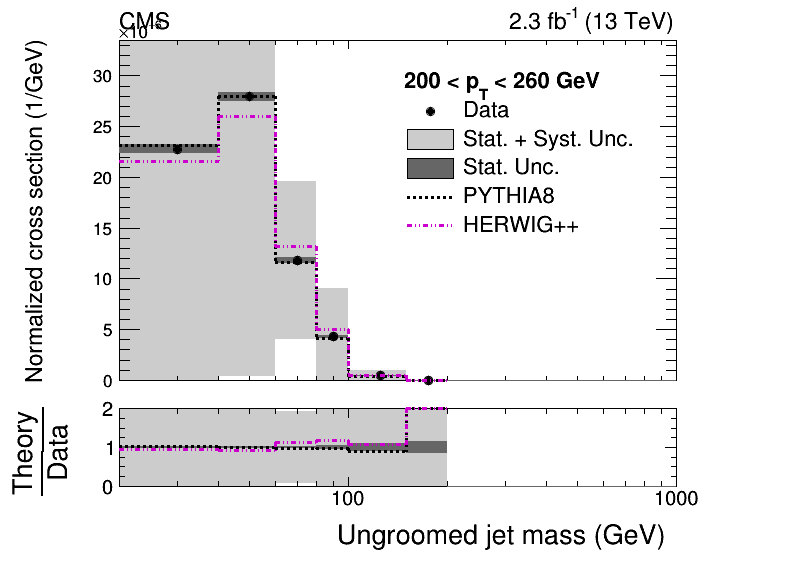

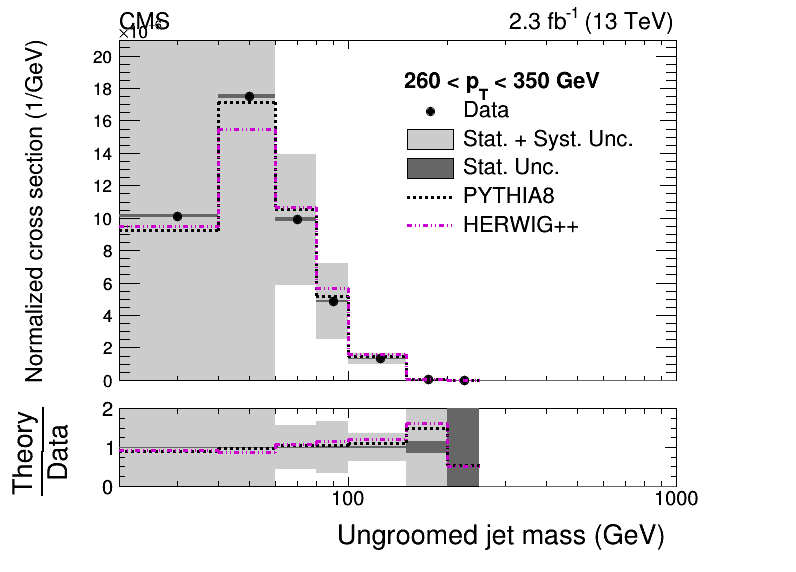

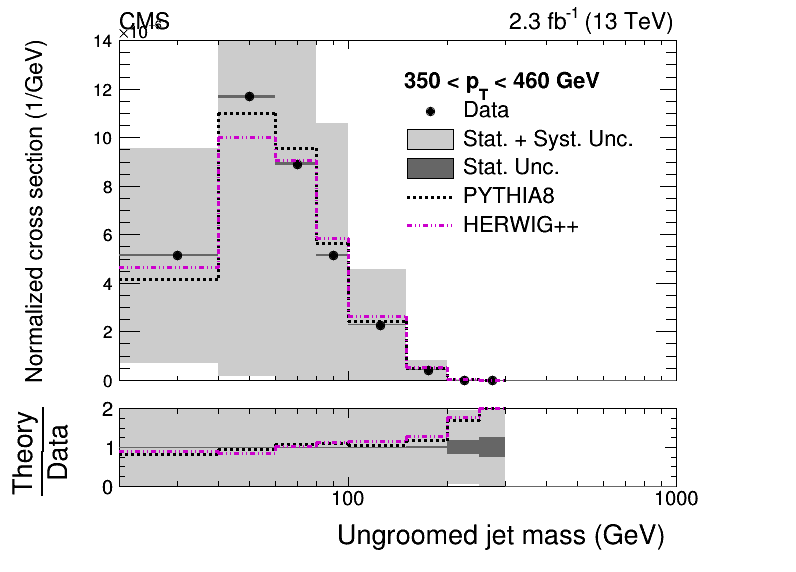

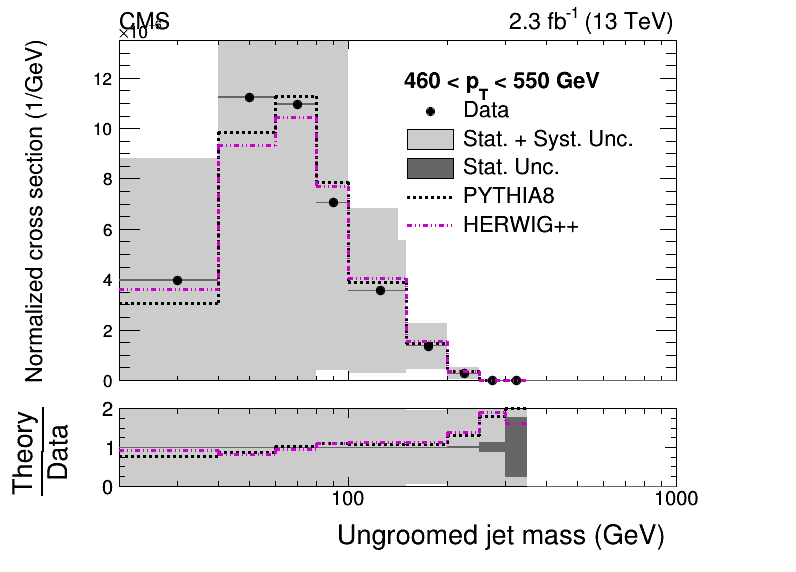

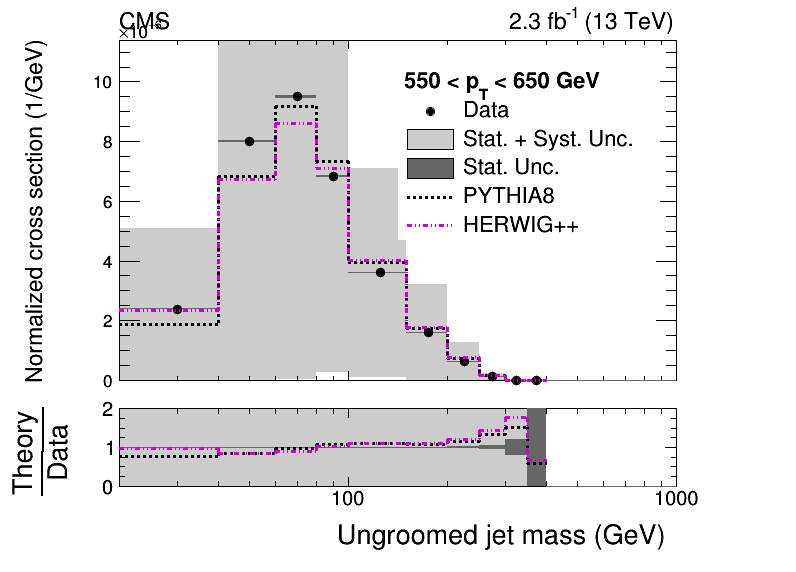

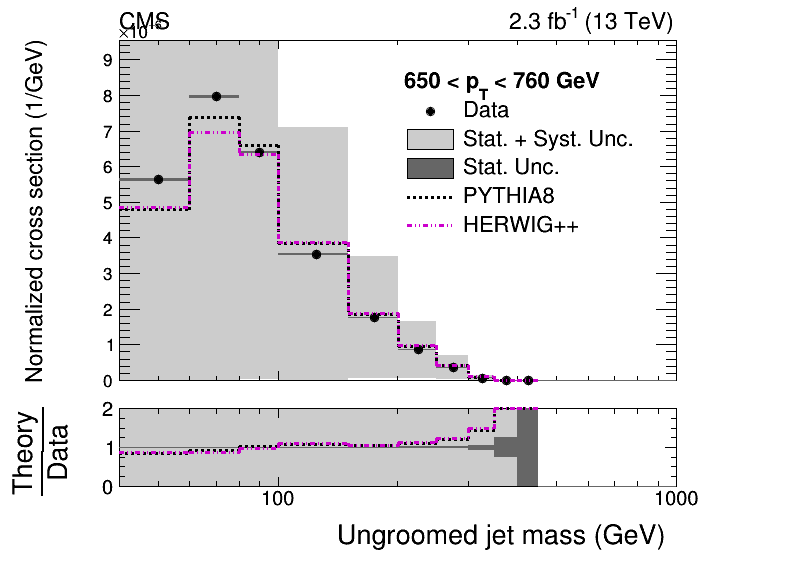

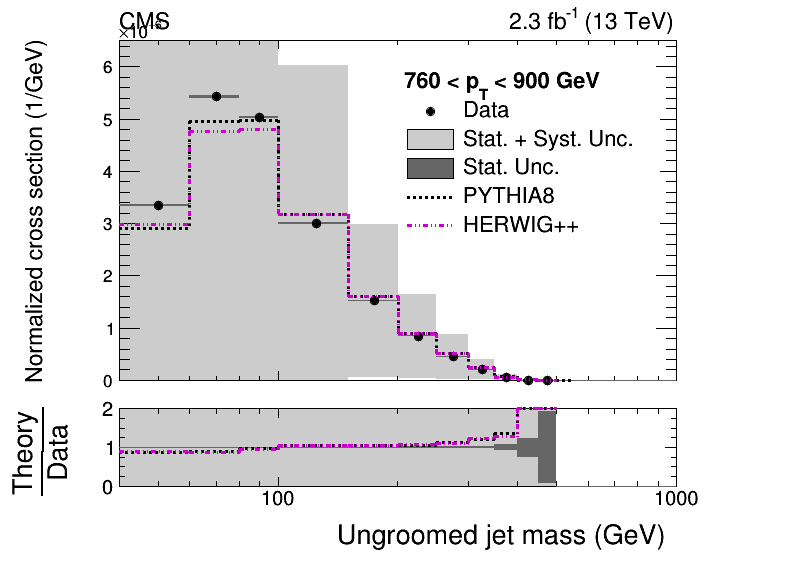

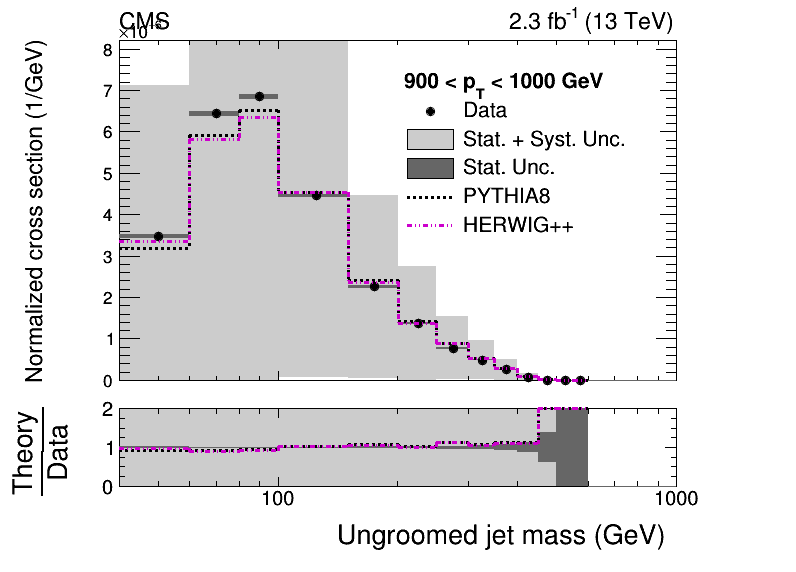

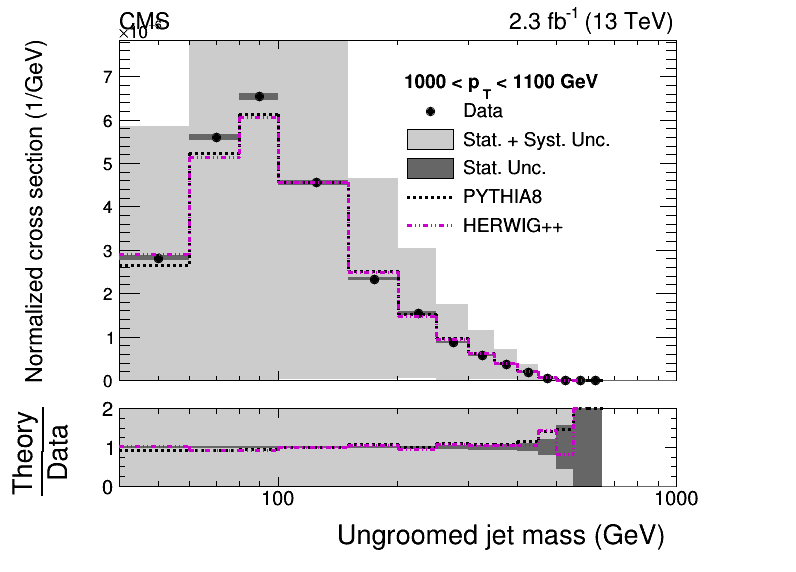

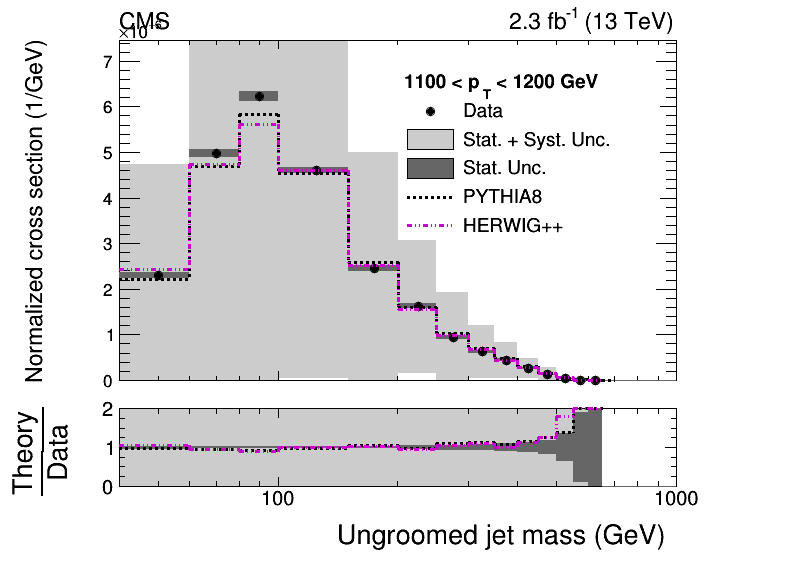

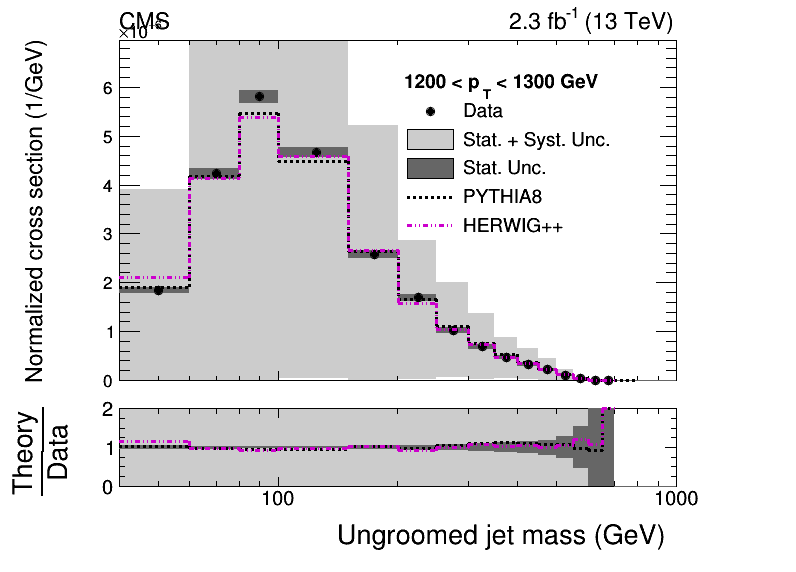

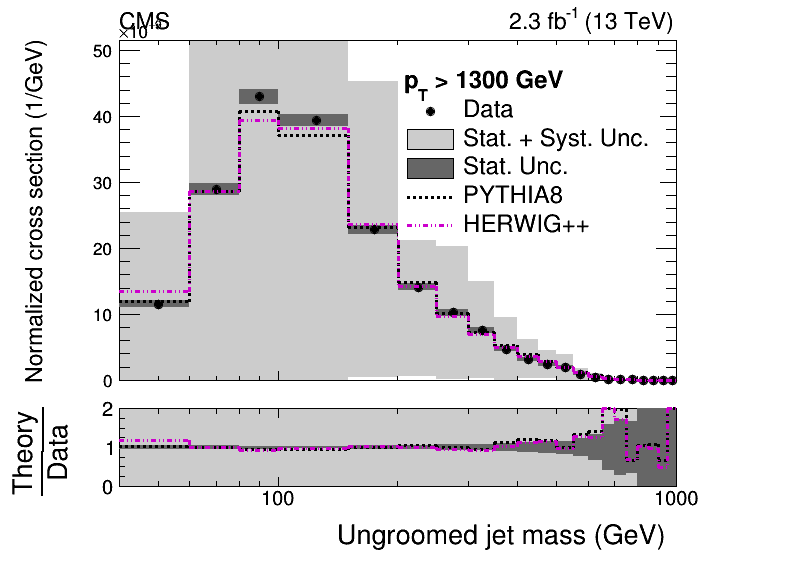

In [7]:
# Now normalized cross section
uu_norm = RooUnfoldUnfolder(useSoftDrop=False,
                       pythiaInputs=pythiafile,
                       herwigInputs=herwigfile,
                       powhegInputs="CMS_SMP_16_010.root",
                       normalizeUnity=True, scalePtBins=True, lumi=lumi,
                       postfix="normalized")

uu_norm.plotFullXSProjections( hists=[uu_norm.nom, uu_norm.nomStat,uu_norm.pythiaHist,uu_norm.herwigHist],
                              styleNames=['nom','nomStat','pythia','herwig'] )


#### Normalized cross section, groomed

109105.935008
PDFUP
8.48e+02 +- 7.08e+01 2.43e+02 +- 1.06e+01 5.39e+01 +- 1.78e+00 1.37e+01 +- 1.78e-01 4.03e+00 +- 5.09e-02 1.47e+00 +- 1.80e-02 6.55e-01 +- 7.82e-03 1.76e-01 +- 3.27e-03 9.09e-02 +- 2.52e-03 4.57e-02 +- 1.62e-03 2.21e-02 +- 9.49e-04 3.52e-02 +- 1.50e-03 
1.63e+04 +- 4.40e+02 2.64e+03 +- 3.56e+01 3.26e+02 +- 3.70e+00 2.18e+02 +- 1.18e+00 7.13e+01 +- 4.27e-01 2.56e+01 +- 1.64e-01 1.14e+01 +- 7.28e-02 3.05e+00 +- 3.42e-02 1.49e+00 +- 2.23e-02 7.67e-01 +- 1.56e-02 4.02e-01 +- 1.04e-02 5.70e-01 +- 1.52e-02 
1.67e+04 +- 3.89e+02 3.84e+03 +- 4.58e+01 4.83e+02 +- 4.80e+00 1.79e+02 +- 8.64e-01 5.94e+01 +- 3.15e-01 2.08e+01 +- 1.20e-01 8.63e+00 +- 4.90e-02 2.24e+00 +- 2.33e-02 1.03e+00 +- 1.42e-02 5.04e-01 +- 9.59e-03 2.53e-01 +- 6.50e-03 3.45e-01 +- 8.06e-03 
1.49e+04 +- 4.38e+02 4.43e+03 +- 5.68e+01 7.93e+02 +- 7.71e+00 1.66e+02 +- 1.03e+00 5.47e+01 +- 3.79e-01 2.07e+01 +- 1.50e-01 9.14e+00 +- 6.63e-02 2.37e+00 +- 2.89e-02 1.08e+00 +- 1.79e-02 5.22e-01 +- 1.16e-02 2.49e-01 +-

0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 1.32e-03 +- 9.61e-04 5.42e-03 +- 2.04e-03 1.28e-02 +- 3.01e-03 1.66e-02 +- 3.17e-03 3.92e-02 +- 5.05e-03 
0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 5.10e-04 +- 5.74e-04 6.87e-04 +- 4.76e-04 5.49e-03 +- 2.06e-03 1.65e-02 +- 3.22e-03 
0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 9.66e-08 +- 6.96e-08 1.61e-03 +- 1.02e-03 1.07e-02 +- 2.56e-03 
0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 4.04e-03 +

0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 1.05e-03 +- 1.68e-03 5.09e-02 +- 8.89e-03 3.20e-01 +- 1.52e-02 2.88e-01 +- 1.38e-02 1.97e-01 +- 1.12e-02 1.16e-01 +- 8.50e-03 5.50e-02 +- 5.64e-03 8.23e-02 +- 7.64e-03 
0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 6.27e-04 +- 1.08e-03 2.20e-02 +- 3.67e-03 9.59e-02 +- 8.16e-03 9.06e-02 +- 7.20e-03 6.13e-02 +- 6.09e-03 4.83e-02 +- 5.75e-03 5.42e-02 +- 6.07e-03 
0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 4.25e-04 +- 2.83e-04 6.49e-03 +- 2.14e-03 2.89e-02 +- 4.24e-03 3.28e-02 +- 4.36e-03 2.87e-02 +- 4.31e-03 5.38e-02 +- 6.01e-03 
0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 1.28e-03 +- 9.53e-04 5.10e-03 +- 1.99e-03 1.30e-02 +- 3.00e-03 1.61e-02 +- 3.10e-03 4.01e-02 +

Info in <TCanvas::Print>: png file fullxs_normalized_softdrop1.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized_softdrop1.pdf has been created
Info in <TCanvas::Print>: png file fullxs_normalized_softdrop2.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized_softdrop2.pdf has been created
Info in <TCanvas::Print>: png file fullxs_normalized_softdrop3.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized_softdrop3.pdf has been created
Info in <TCanvas::Print>: png file fullxs_normalized_softdrop4.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized_softdrop4.pdf has been created
Info in <TCanvas::Print>: png file fullxs_normalized_softdrop5.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized_softdrop5.pdf has been created
Info in <TCanvas::Print>: png file fullxs_normalized_softdrop6.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized_softdrop6.pdf has been 

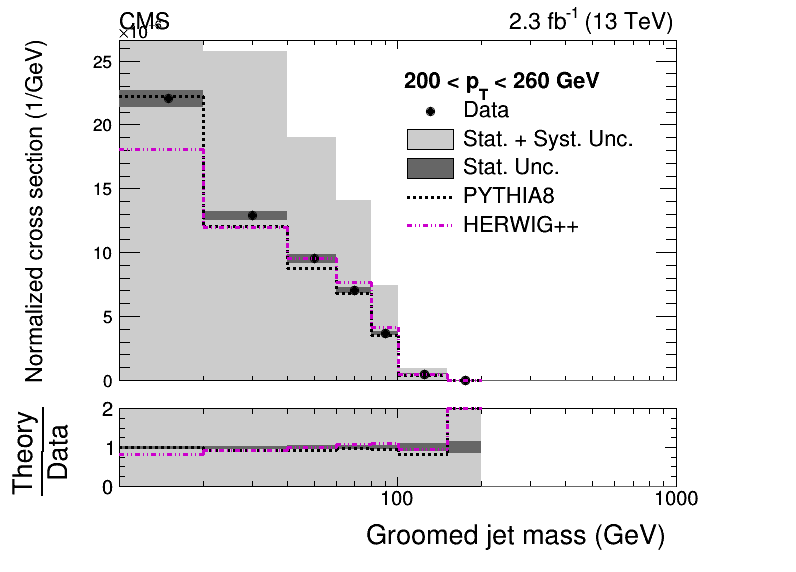

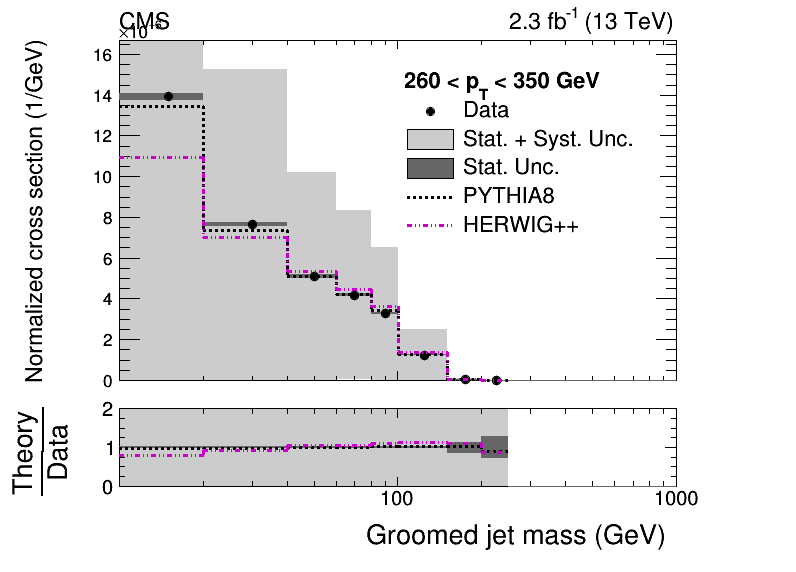

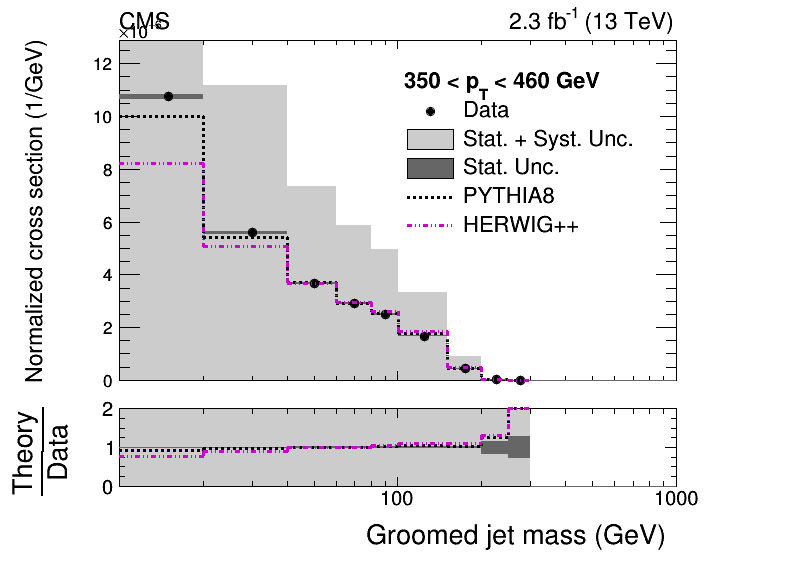

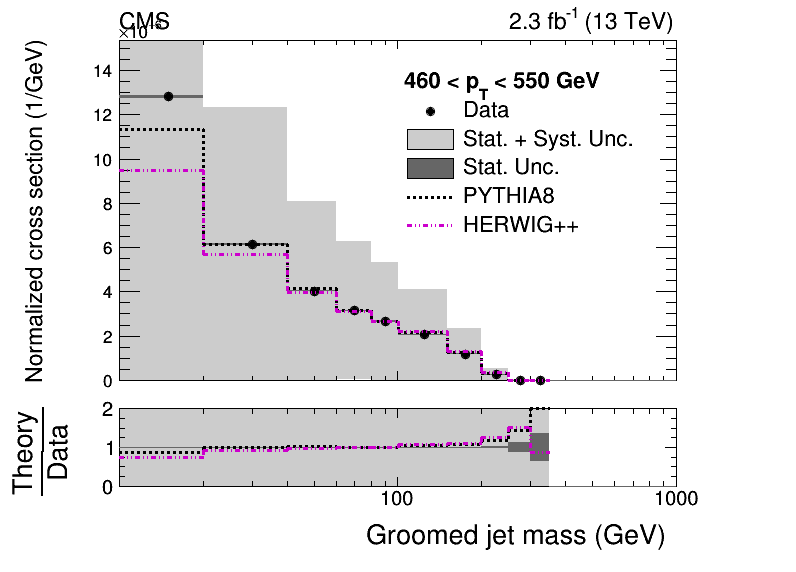

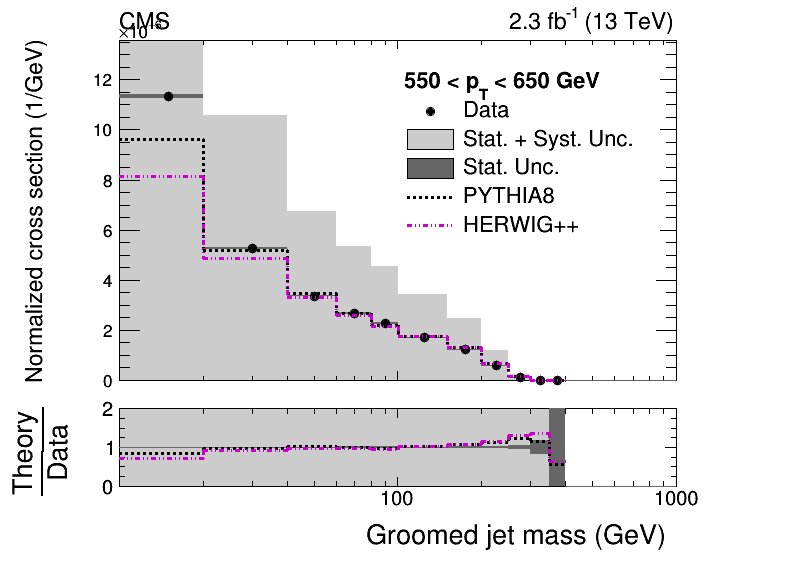

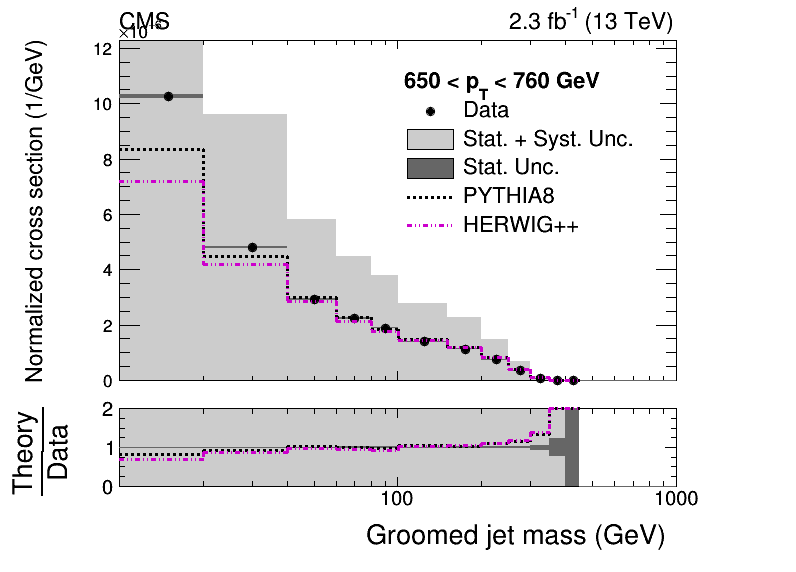

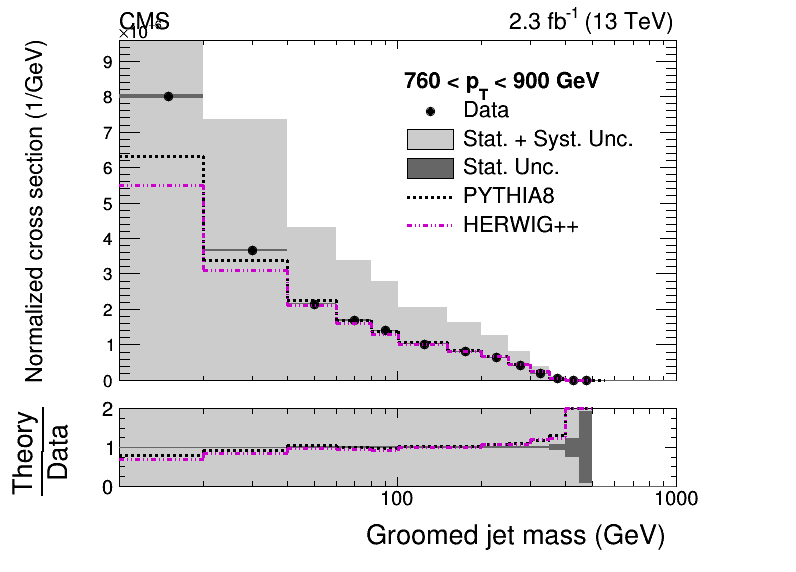

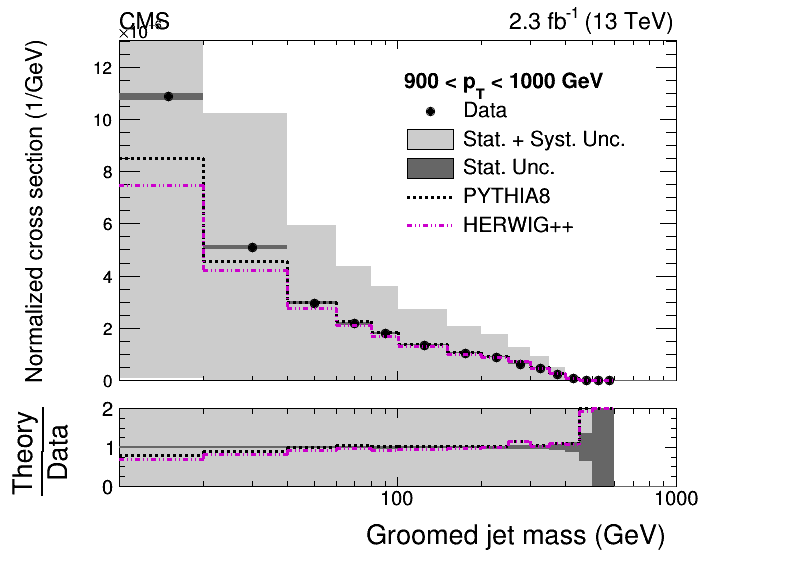

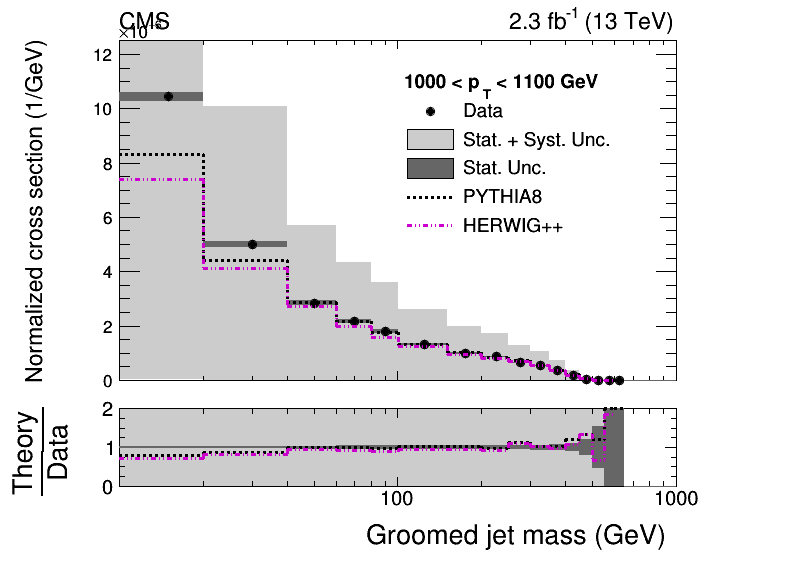

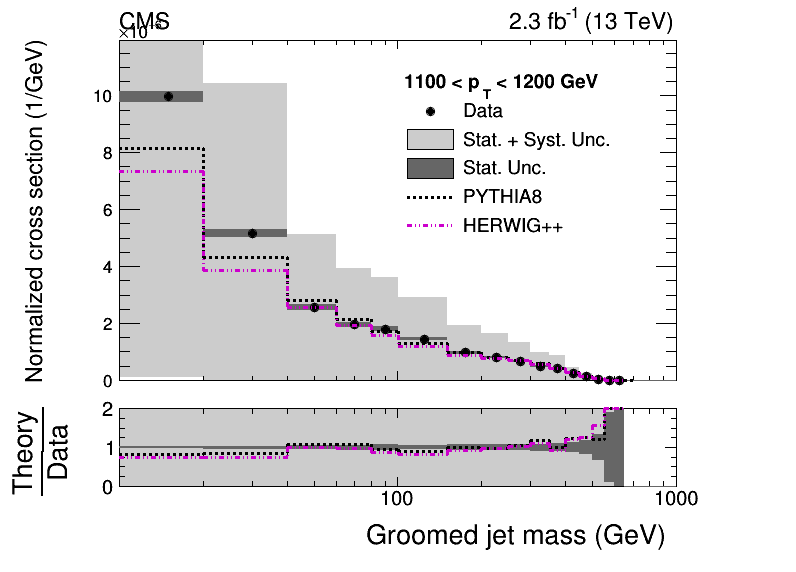

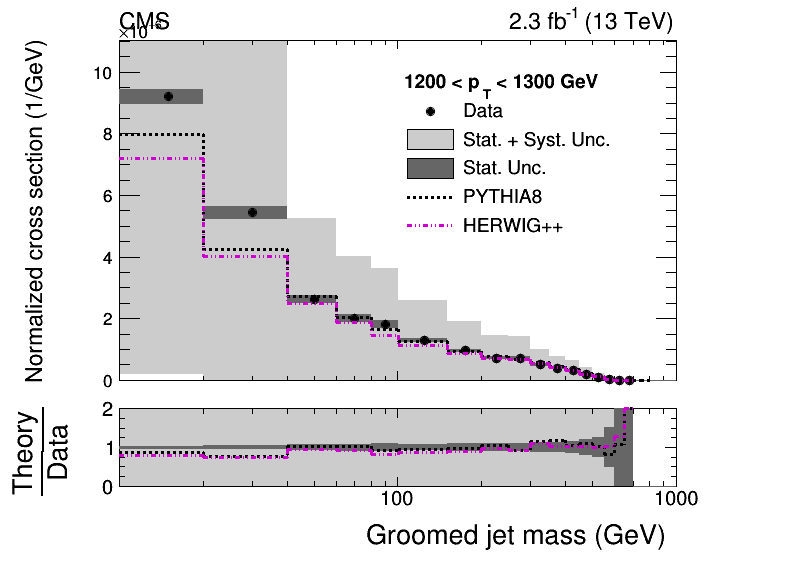

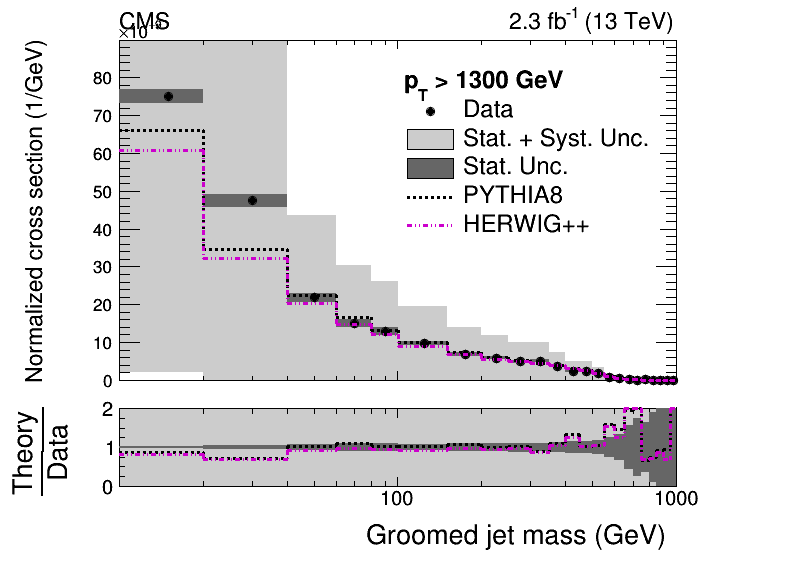

In [8]:

ug_norm = RooUnfoldUnfolder(useSoftDrop=True,
                       pythiaInputs=pythiafile,
                       herwigInputs=herwigfile,
                       powhegInputs="CMS_SMP_16_010.root",
                       normalizeUnity=True, scalePtBins=True, lumi=lumi,
                       postfix="normalized_softdrop")

ug_norm.plotFullXSProjections( hists=[ug_norm.nom, ug_norm.nomStat,ug_norm.pythiaHist,ug_norm.herwigHist],
                              styleNames=['nom','nomStat','pythia','herwig'] )




#### Plot 2d cross sections

In [9]:
uu_norm.draw2D("absolute_ungroomed")

In [10]:
ug_norm.draw2D("absolute_groomed") 

In [11]:
uu_norm.draw2D("normalized_ungroomed")

In [12]:
ug_norm.draw2D("normalized_groomed")

#### Ungroomed uncertainties, normalized

123597.850816
PDFUP
0.00e+00 +- 0.00e+00 2.25e-06 +- 2.49e-07 2.75e-07 +- 2.57e-07 1.24e-07 +- 5.57e-09 1.29e-08 +- 1.17e-09 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 1.89e-08 +- 4.54e-10 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 1.78e-09 +- 1.81e-10 
2.15e-03 +- 9.64e-05 5.63e-04 +- 5.29e-05 1.97e-06 +- 1.15e-06 5.74e-07 +- 6.52e-08 1.38e-07 +- 3.36e-09 0.00e+00 +- 0.00e+00 1.07e-07 +- 5.20e-09 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 2.28e-09 +- 9.18e-11 0.00e+00 +- 0.00e+00 
1.06e-01 +- 5.93e-03 7.14e-03 +- 3.65e-04 9.48e-05 +- 4.51e-05 6.89e-06 +- 2.94e-07 3.17e-06 +- 1.33e-06 2.85e-07 +- 3.40e-08 4.74e-08 +- 2.42e-09 1.25e-08 +- 1.08e-09 1.11e-08 +- 5.62e-10 5.18e-10 +- 5.56e-11 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 
5.46e+00 +- 1.72e-01 3.95e-01 +- 1.62e-02 5.04e-03 +- 2.47e-03 6.47e-04 +- 1.81e-05 1.12e-04 +- 1.17e-06 2.27e-05 +- 3.11e-07 3.80e-06 +- 6.34e-08 1.00e-06 +- 2.91e-08 2.16e-07 +- 2.53e-08 2.26e-08 +- 1.18e-09 2.92e-08 +-

0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 2.75e-08 +- 1.61e-08 1.10e-07 +- 2.87e-08 2.03e-06 +- 1.02e-07 
0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 2.54e-09 +- 3.77e-09 8.81e-07 +- 5.39e-08 
0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 5.33e-07 +- 4.48e-08 
0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 2.44e-07 +

0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 1.06e-07 +- 5.96e-08 4.40e-07 +- 1.02e-07 1.31e-06 +- 1.53e-07 2.00e-06 +- 1.77e-07 5.22e-06 +- 1.61e-07 
0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 5.46e-08 +- 2.72e-08 1.74e-07 +- 5.37e-08 5.33e-07 +- 9.08e-08 3.37e-06 +- 1.38e-07 
0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 2.94e-08 +- 1.69e-08 1.15e-07 +- 2.92e-08 1.80e-06 +- 9.23e-08 
0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 4.89e-09 +- 6.21e-09 8.07e-07 +

Info in <TCanvas::Print>: png file uncertainties_ungroomed1.png has been created
Info in <TCanvas::Print>: pdf file uncertainties_ungroomed1.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file uncertainties_ungroomed1.root has been created
Info in <TCanvas::Print>: png file uncertainties_ungroomed2.png has been created
Info in <TCanvas::Print>: pdf file uncertainties_ungroomed2.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file uncertainties_ungroomed2.root has been created
Info in <TCanvas::Print>: png file uncertainties_ungroomed3.png has been created
Info in <TCanvas::Print>: pdf file uncertainties_ungroomed3.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file uncertainties_ungroomed3.root has been created
Info in <TCanvas::Print>: png file uncertainties_ungroomed4.png has been created
Info in <TCanvas::Print>: pdf file uncertainties_ungroomed4.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file uncertainties_ungroomed4.root has been created
Info in <TCanvas

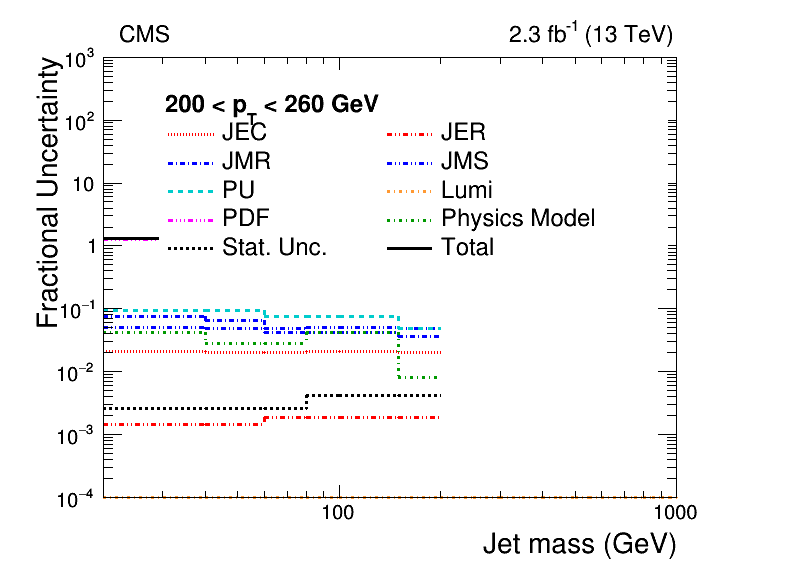

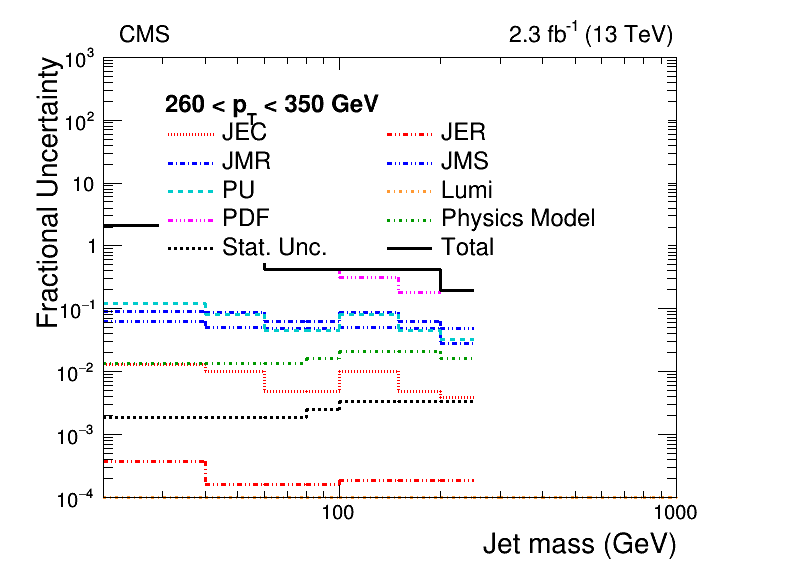

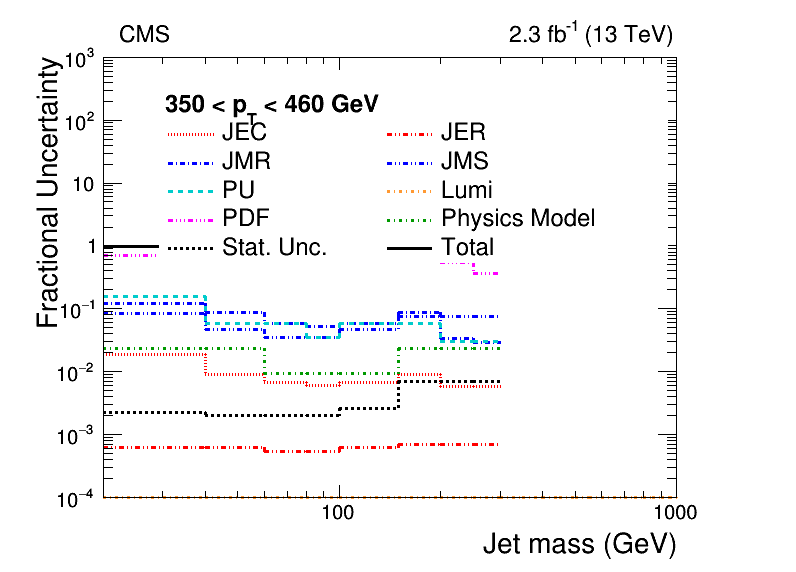

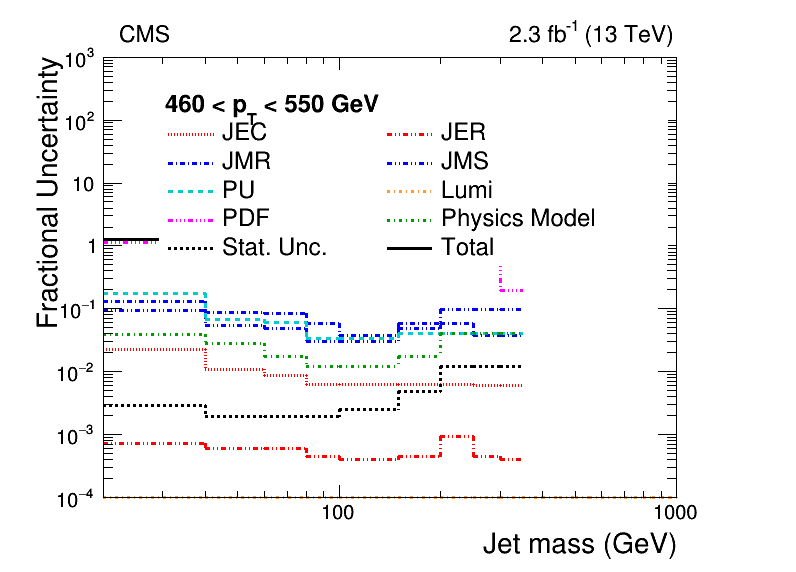

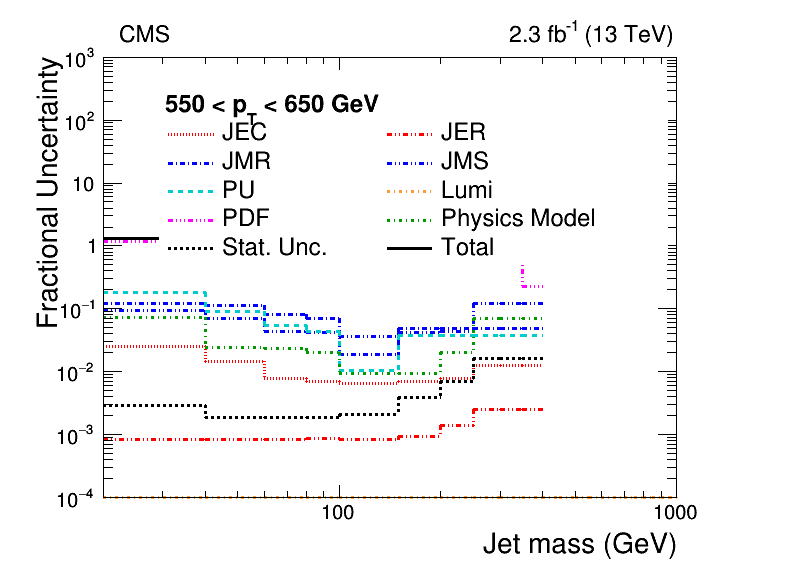

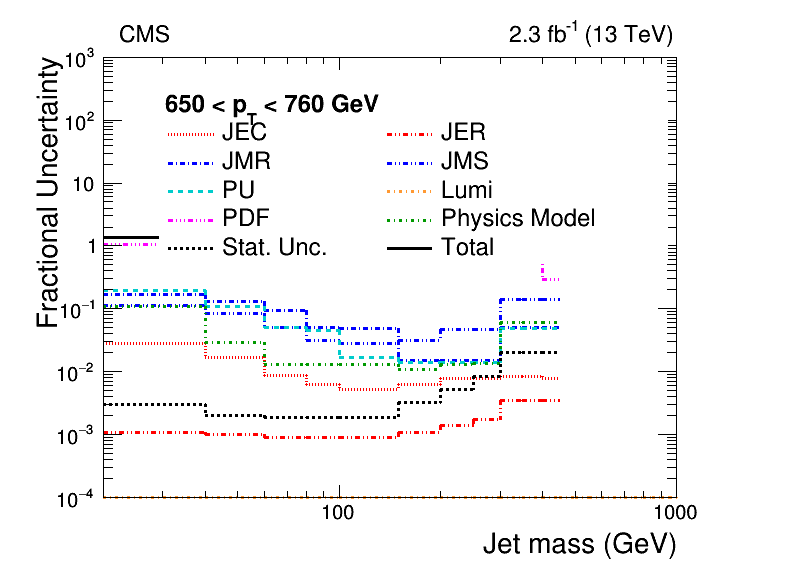

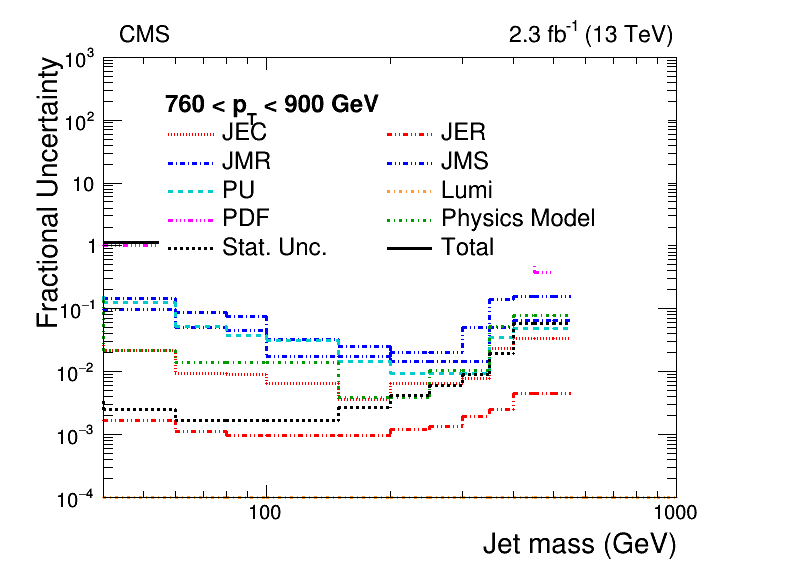

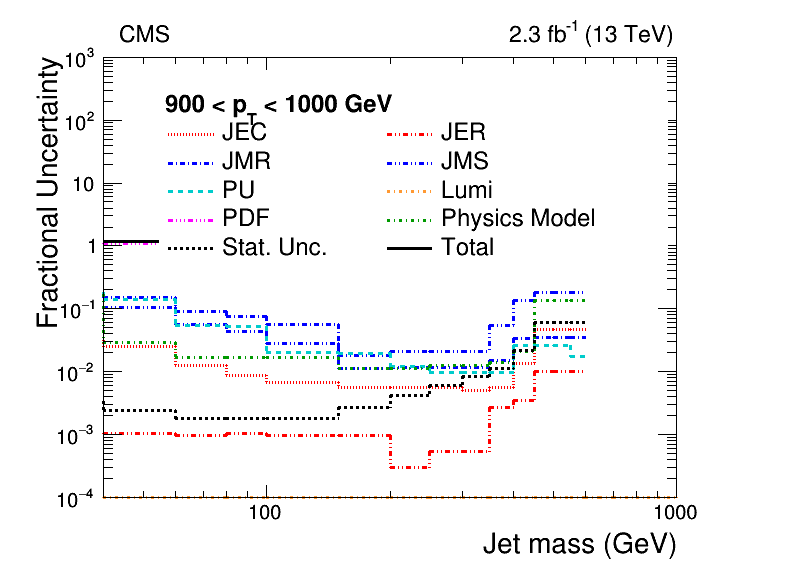

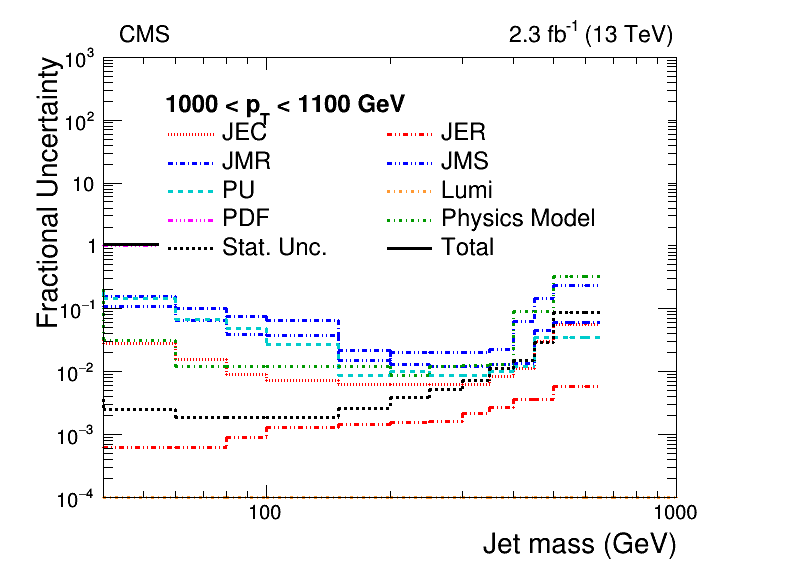

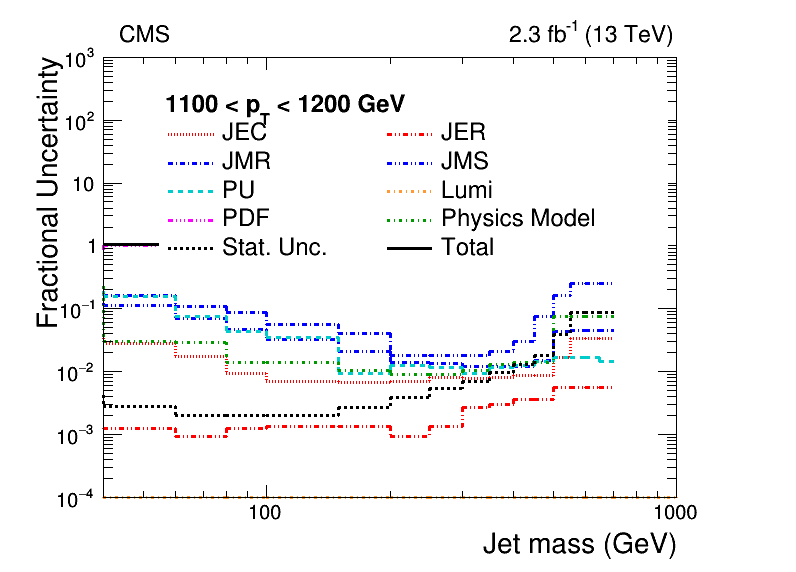

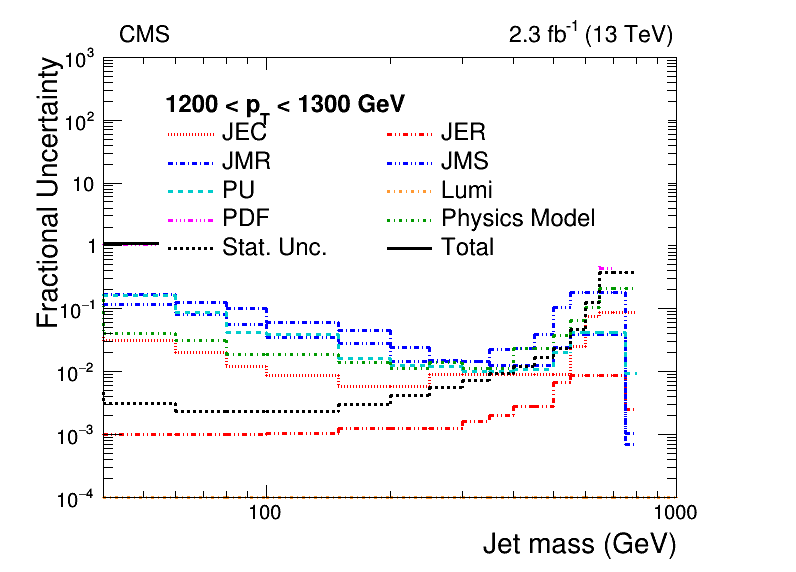

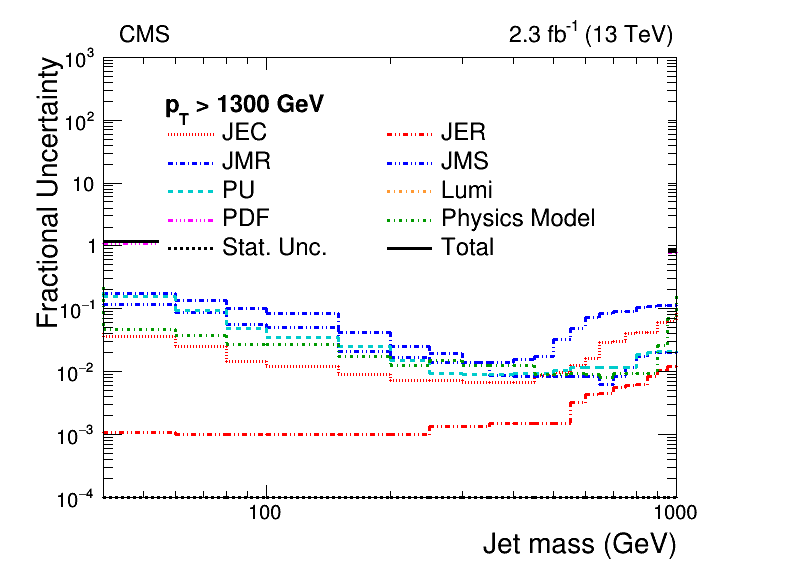

In [13]:


uumc_norm = RooUnfoldUnfolder(useSoftDrop=False, inputs="2DClosure",
                       pythiaInputs=pythiafile,
                       herwigInputs=herwigfile,
                       powhegInputs="CMS_SMP_16_010.root",
                       normalizeUnity=True, scalePtBins=True, lumi=lumi, postfix="ungroomed")


uumc_norm.plotFullUncs( hists=uumc_norm.uncertainties)



#### Groomed uncertainties, normalized

123328.214753
PDFUP
8.64e-02 +- 7.67e-03 2.75e-02 +- 6.59e-03 6.51e-03 +- 3.06e-03 1.34e-03 +- 3.04e-04 5.17e-04 +- 1.06e-05 2.04e-04 +- 2.12e-06 8.98e-05 +- 8.07e-07 2.57e-05 +- 2.49e-07 1.33e-05 +- 1.47e-07 6.50e-06 +- 6.56e-08 3.26e-06 +- 3.41e-08 4.92e-06 +- 4.15e-08 
1.78e+00 +- 8.22e-02 5.38e-01 +- 4.83e-01 1.19e-01 +- 1.50e-01 2.42e-02 +- 2.25e-03 9.05e-03 +- 2.90e-04 3.52e-03 +- 3.87e-05 1.53e-03 +- 7.90e-06 4.18e-04 +- 2.55e-06 2.07e-04 +- 1.26e-06 1.07e-04 +- 6.95e-07 5.70e-05 +- 3.98e-07 7.54e-05 +- 4.08e-07 
1.74e+00 +- 1.39e-01 4.91e-01 +- 1.78e-01 1.01e-01 +- 7.09e-02 1.90e-02 +- 1.43e-03 6.83e-03 +- 2.66e-04 2.56e-03 +- 2.80e-05 1.06e-03 +- 5.13e-06 2.79e-04 +- 1.70e-06 1.32e-04 +- 8.06e-07 6.55e-05 +- 4.29e-07 3.41e-05 +- 2.46e-07 4.29e-05 +- 2.10e-07 
1.57e+00 +- 1.30e-01 4.37e-01 +- 3.82e-02 8.96e-02 +- 2.35e-02 1.64e-02 +- 2.02e-03 5.81e-03 +- 1.25e-04 2.16e-03 +- 2.10e-05 8.77e-04 +- 5.76e-06 2.26e-04 +- 1.65e-06 1.07e-04 +- 8.18e-07 5.29e-05 +- 4.24e-07 2.75e-05 +-

0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 2.64e-08 +- 1.59e-08 1.12e-07 +- 2.83e-08 1.69e-06 +- 8.80e-08 
0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 3.60e-09 +- 4.62e-09 7.92e-07 +- 4.95e-08 
0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 4.50e-07 +- 3.59e-08 
0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 2.16e-07 +

0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 6.83e-04 +- 9.57e-05 2.24e-03 +- 1.06e-04 2.01e-03 +- 4.81e-05 1.02e-03 +- 1.38e-05 4.79e-04 +- 6.12e-06 1.19e-04 +- 1.91e-06 5.48e-05 +- 9.78e-07 2.63e-05 +- 5.04e-07 1.32e-05 +- 3.00e-07 1.54e-05 +- 2.63e-07 
0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 2.84e-06 +- 1.42e-06 7.71e-05 +- 1.09e-05 4.20e-04 +- 2.40e-05 4.99e-04 +- 1.27e-05 3.19e-04 +- 5.32e-06 9.94e-05 +- 1.83e-06 4.75e-05 +- 9.08e-07 2.31e-05 +- 4.96e-07 1.17e-05 +- 2.93e-07 1.33e-05 +- 2.46e-07 
0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 4.97e-07 +- 1.27e-07 1.86e-05 +- 2.78e-06 1.07e-04 +- 7.30e-06 1.68e-04 +- 5.16e-06 6.36e-05 +- 1.53e-06 3.55e-05 +- 8.45e-07 1.89e-05 +- 4.83e-07 1.01e-05 +- 2.83e-07 1.17e-05 +- 2.33e-07 
0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 0.00e+00 +- 0.00e+00 1.22e-07 +- 1.67e-07 6.12e-06 +- 1.36e-06 4.17e-05 +- 2.61e-06 3.56e-05 +- 1.33e-06 2.37e-05 +- 7.31e-07 1.32e-05 +- 3.98e-07 7.90e-06 +- 2.54e-07 1.05e-05 +

Info in <TCanvas::Print>: png file uncertainties_softdrop1.png has been created
Info in <TCanvas::Print>: pdf file uncertainties_softdrop1.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file uncertainties_softdrop1.root has been created
Info in <TCanvas::Print>: png file uncertainties_softdrop2.png has been created
Info in <TCanvas::Print>: pdf file uncertainties_softdrop2.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file uncertainties_softdrop2.root has been created
Info in <TCanvas::Print>: png file uncertainties_softdrop3.png has been created
Info in <TCanvas::Print>: pdf file uncertainties_softdrop3.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file uncertainties_softdrop3.root has been created
Info in <TCanvas::Print>: png file uncertainties_softdrop4.png has been created
Info in <TCanvas::Print>: pdf file uncertainties_softdrop4.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file uncertainties_softdrop4.root has been created
Info in <TCanvas::Print>: pn

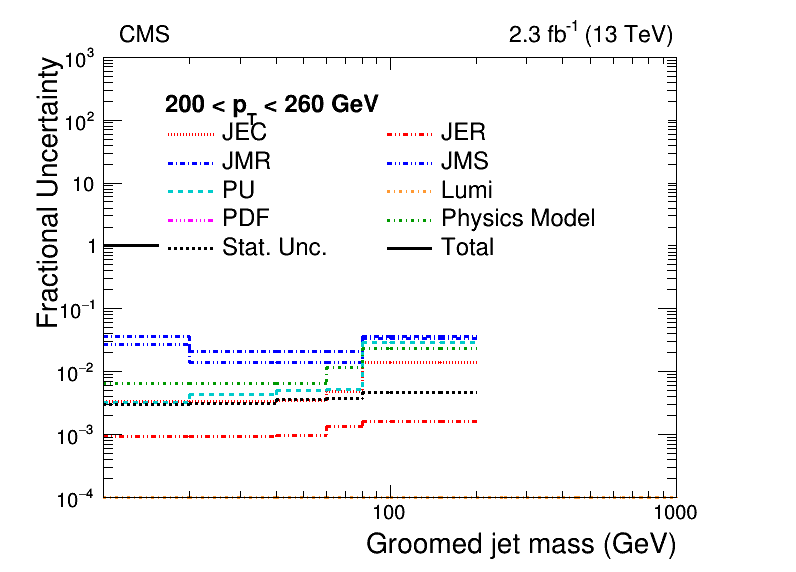

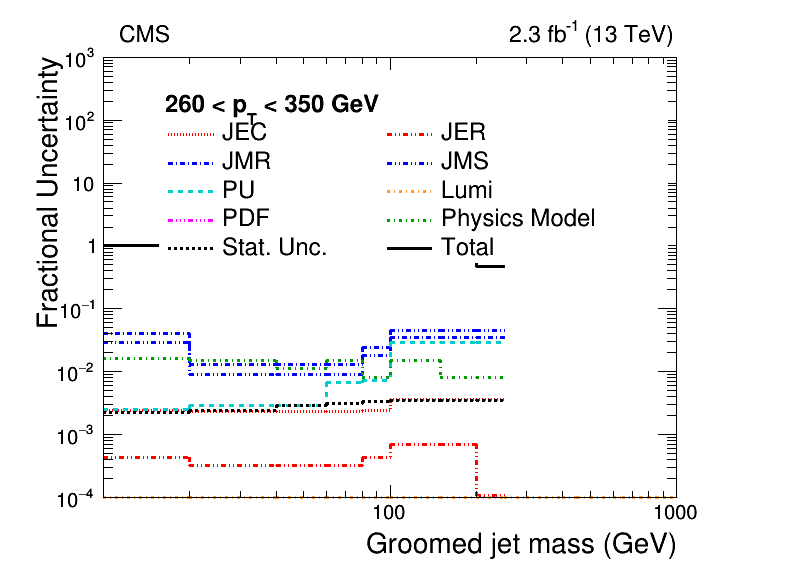

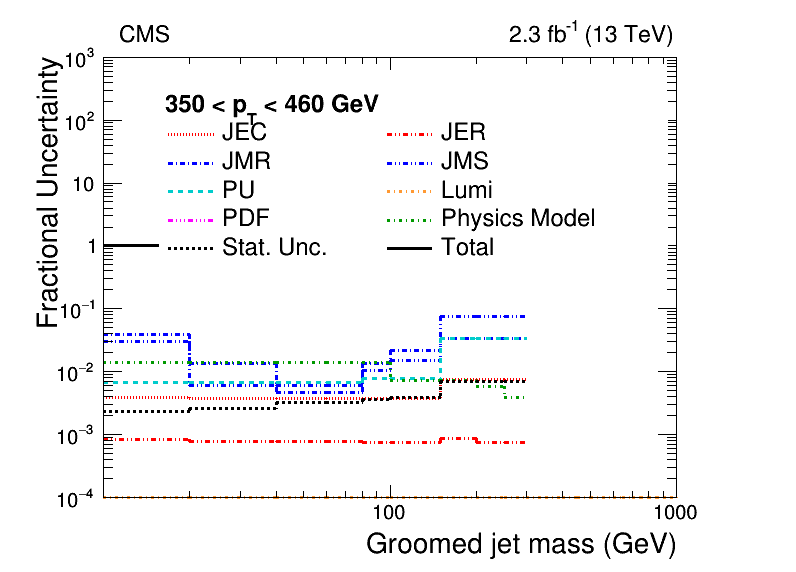

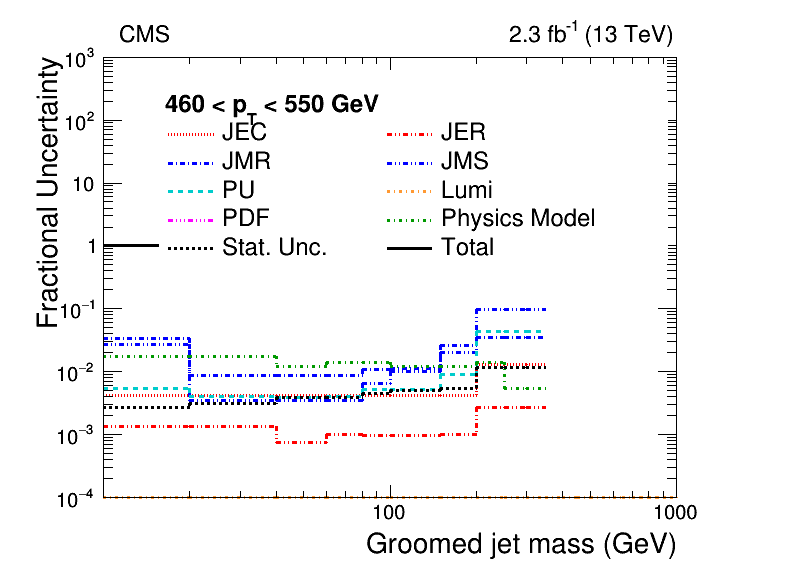

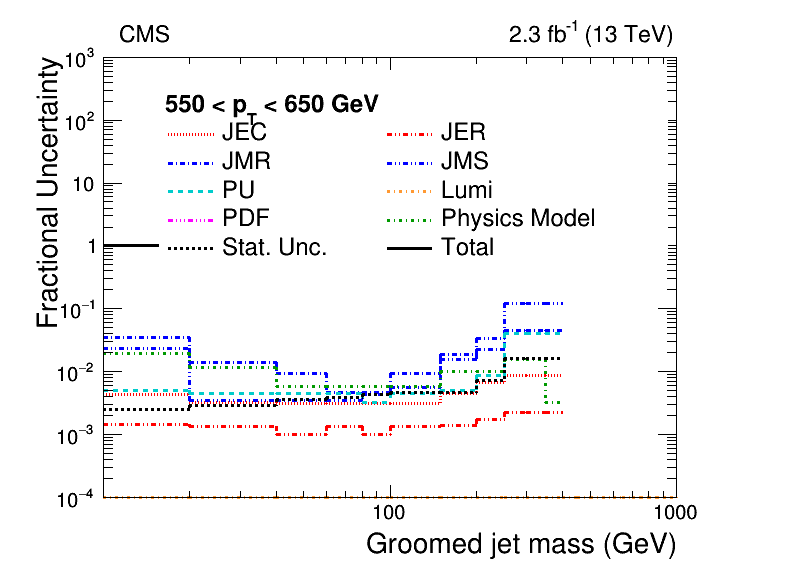

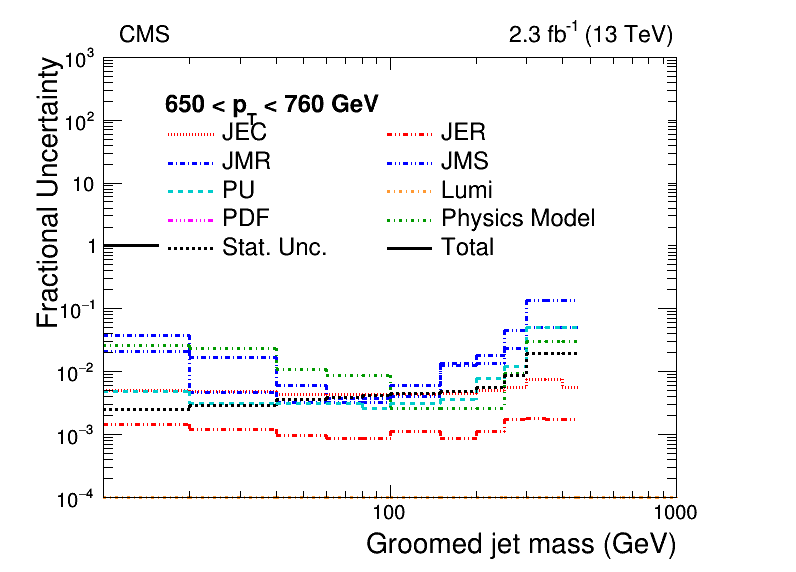

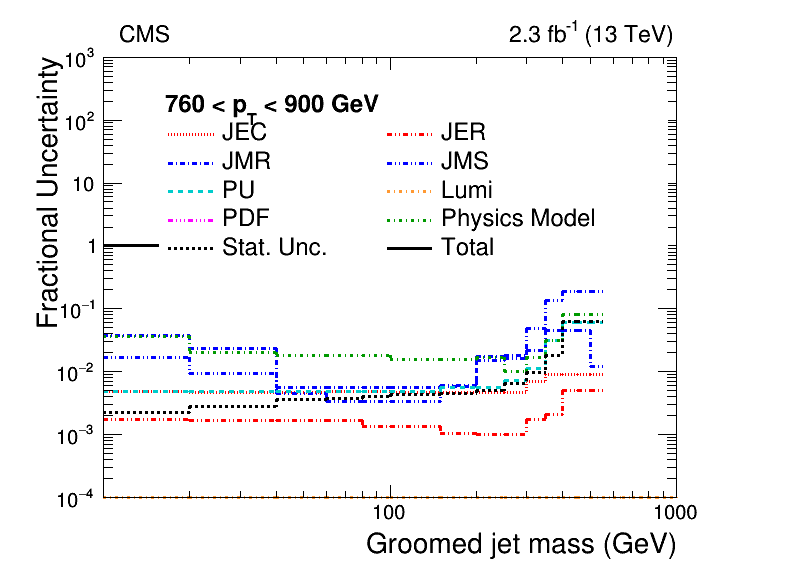

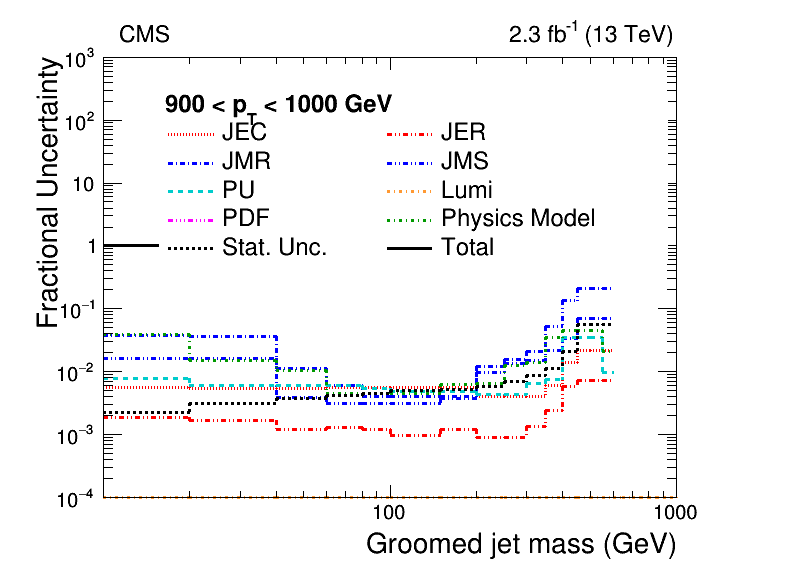

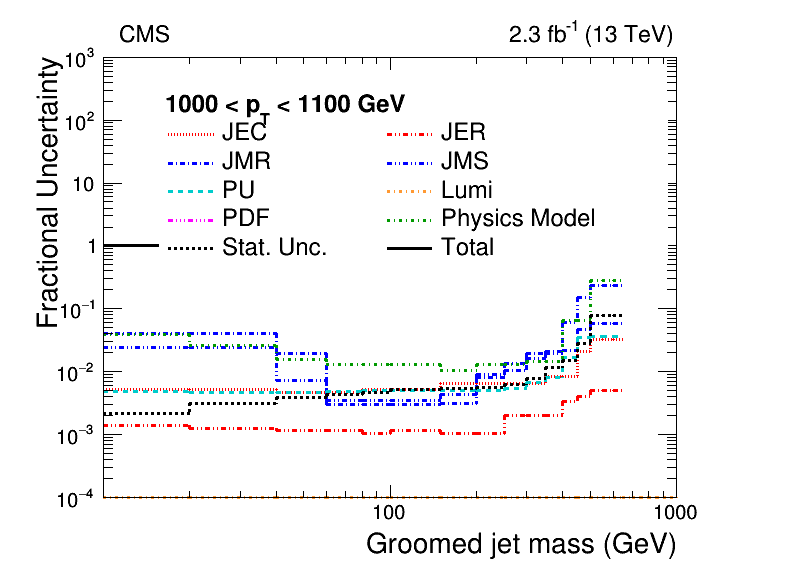

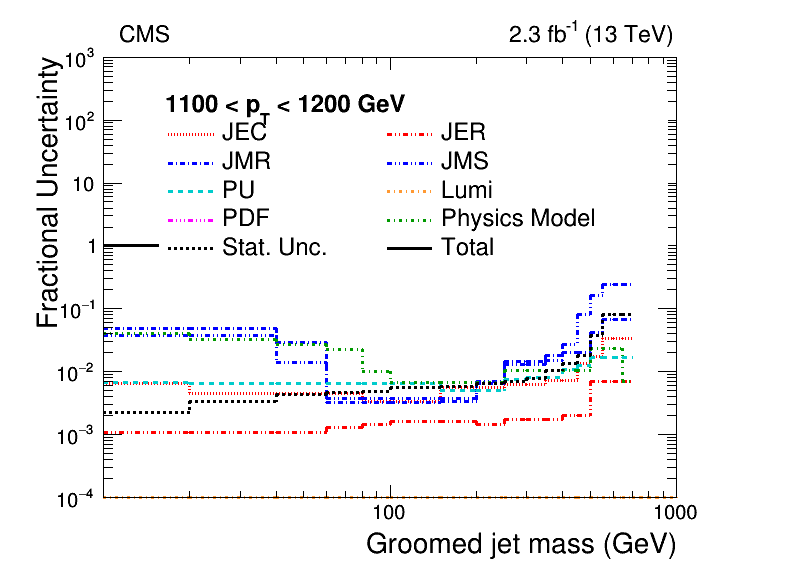

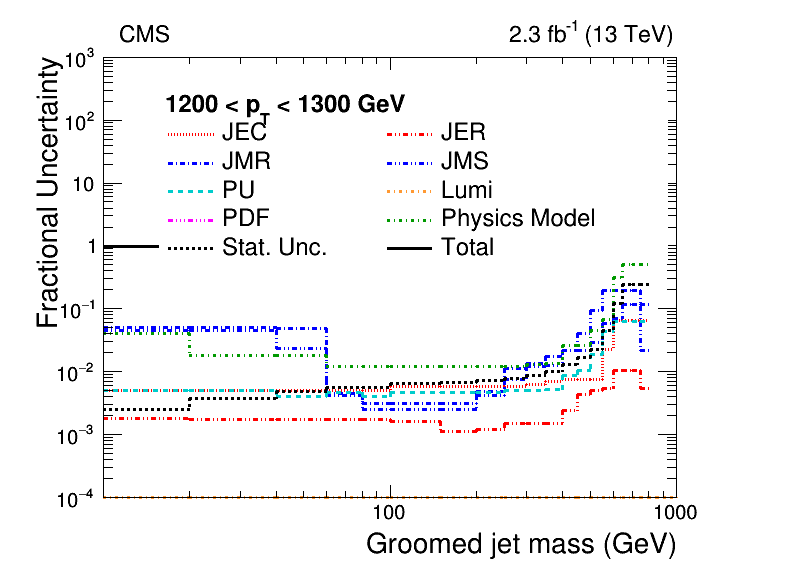

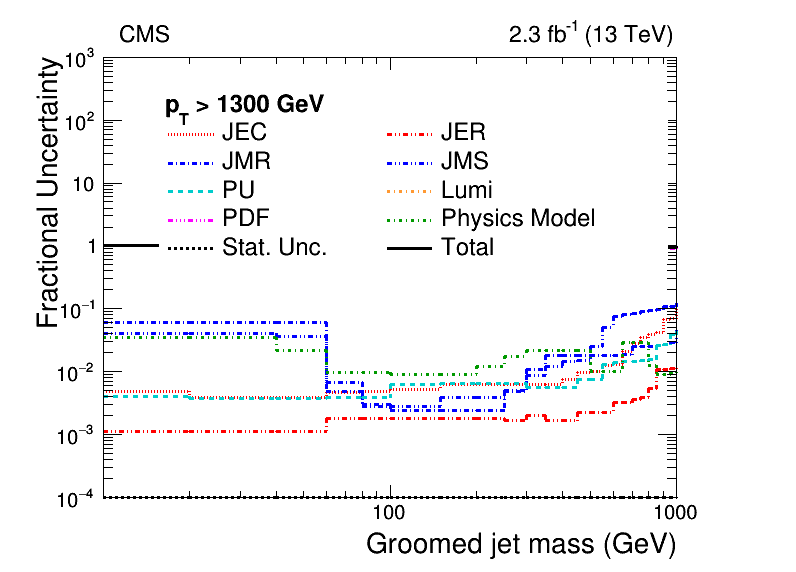

In [14]:

ugmc_norm = RooUnfoldUnfolder(useSoftDrop=True, inputs="2DClosure",
                       pythiaInputs=pythiafile,
                       herwigInputs=herwigfile,
                       powhegInputs="CMS_SMP_16_010.root",
                       normalizeUnity=True, scalePtBins=True, lumi=lumi,  postfix="softdrop")

ugmc_norm.plotFullUncs(hists=ugmc_norm.uncertainties)

